In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font globally to Malgun Gothic, which supports Korean
# Replace 'Malgun Gothic' with the name of the font you have installed if necessary

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# plt.rcParams['font.family'] = 'AppleGothic.ttf'
plt.rcParams['axes.unicode_minus'] = False  # To properly display negative signs


from codes.appendix import SectCode
from codes.appendix import FatrCode

In [1]:
from src.api import SmartFarmAPI

api = SmartFarmAPI(config="config.yaml")

Snaity check를 위해 스마트팜 보급 농가의 사용자ID, 시설ID, 지역, 품목코드 조회합니다.

        상세 기능 번호  : 1
        상세 기능 설명  : 스마트팜 보급 농가의 사용자ID, 시설ID, 지역, 품목코드 조회   
        
        * 요청 메세지 명세 *
            - `None`
        
        * 응답 메세지 명세 *
            - `userId`      : 사용자 ID
            - `facilityId`  : 시설 ID
            - `addressName` : 지역명 (법정동명)
            - `itemCode`    : 품목코드 (별첨 1. 품목코드 참고: ItemCode.get_code())
        

        * Response *
            - statusCode    : 00
            - statusMessage : NORMAL_CODE
            - statusDesc    : 정상
        
Service key가 유효합니다.


### 2021년에 재배된 작물들의 데이터를 리스트

In [124]:
df = pd.DataFrame(api.crop_season.getCroppingSeasonDataList("2021"))
df


        상세 기능 번호  : 1
        상세 기능 설명  : 스마트팜 보급 농가 사용자의 작기 정보 조회 
        
        * 요청 메세지 명세 *    
            year: 작기 시작 년도 String (형식 : yyyy)
            
        * 응답 메세지 명세 *
            facilityId: 시설 ID String 
            addressName: 지역명 String (법정동명)
            croppingSerlNo: 작기 일련번호 Integer 
            itemCode       : 품목코드 String 
            itemName: 품목명 String
            croppingDate: 작기 시작 일자 String (형식 : yyyy-mm-dd)
            croppingEndDate: 작기 종료 일자 String (형식 : yyyy-mm-dd)
            acqAutoYn: 환경정보 등록 유무 String (Y : 등록, N : 미등록)
            acqManlYn: 제어정보 등록 유무 String (Y : 등록, N : 미등록)
            acqCultiYn: 생육정보 등록 유무 String (Y : 등록, N : 미등록)
            acqMgmtYn : 경영정보 등록 유무 String (Y : 등록, N : 미등록)
        

        * Response *
            - statusCode    : 00
            - statusMessage : NORMAL_CODE
            - statusDesc    : 정상
        


statusCode statusMessage     facilityId addressName  croppingSerlNo  \
0           00   NORMAL_CODE  PF_0010071_01    충청남도 부여군            4419   
1         None          None  PF_0010056_01    충청남도 부여군            4420   
2         None          None  PF_0010076_01    전라북도 김제시            4430   
3         None          None  PF_0001403_01    전라북도 남원시            3900   
4         None          None  PF_0020763_01    충청남도 부여군            4431   
..         ...           ...            ...         ...             ...   
247       None          None  PF_0010056_01    충청남도 부여군            5031   
248       None          None  PF_0020762_01    충청남도 부여군            4558   
249       None          None  PF_0020762_01    충청남도 부여군            5034   
250       None          None  PF_0000227_01    전라남도 화순군            4732   
251       None          None  PF_0022078_01    전라남도 화순군            4918   

    itemCode itemName croppingDate croppingEndDate acqAutoYn acqManlYn  \
0     080300      토마토   2021-01-12      2021-06-30         Y         Y   
1     080300      토마토   2021-01-12      2021-06-30         Y         Y   
2     080300      토마토   2021-01-25      2021-07-30         Y         Y   
3     132600     파프리카   2021-01-26      2022-01-06         Y         Y   
4     080300      토마토   2021-01-30      2021-07-30         Y         Y   
..       ...      ...          ...             ...       ...       ...   
247   080300      토마토   2021-12-18      2022-06-30         Y         Y   
248   090100       오이   2021-12-24      2022-05-30         Y         Y   
249   090100       오이   2021-12-28      2022-05-30         Y         Y   
250   080300      토마토   2021-12-30      2022-06-30         Y         Y   
251   080300      토마토   2021-12-30      2022-06-30         Y         Y   

    acqCultiYn acqMgmtYn  
0            Y         N  
1            Y         N  
2            Y         N  
3            Y         N  
4            Y         N  
..         ...       ...  
247          Y         N  
248          Y         N  
249          Y         N  
250          N         N  
251          N         N  

[252 rows x 13 columns]

In [125]:
# 데이터 리스트 중 재배 작물이 토마토인 것만을 선별
df_tomato = df[df["itemName"] == "토마토"]

In [126]:
# 그 중 가장 첫번째 있는 재배 데이터를 선별
df_tomato.iloc[0]

statusCode                    00
statusMessage        NORMAL_CODE
facilityId         PF_0010071_01
addressName             충청남도 부여군
croppingSerlNo              4419
itemCode                  080300
itemName                     토마토
croppingDate          2021-01-12
croppingEndDate       2021-06-30
acqAutoYn                      Y
acqManlYn                      Y
acqCultiYn                     Y
acqMgmtYn                      N
Name: 0, dtype: object

1. statusCode를 보아 데이터를 잘 응답받음
2. 충청남도 부여군 의 데이터
3. croppingSerlNo은 4419 (뒤에 사용)
4. itemCode 는 "토마토" 임
5. 2021-01-12 ~ 2021-06-30 까지의 데이터임.
6. acqAutoYn: 환경정보 등록 유무 String (Y : 등록)<br>
   acqManlYn: 제어정보 등록 유무 String (Y : 등록)<br>
   acqCultiYn: 생육정보 등록 유무 String (Y : 등록)<br>
   acqMgmtYn : 경영정보 등록 유무 String (N : 미등록)<br>

In [127]:
pd.DataFrame(api.crop_season.getCroppingSeasonEnvDataList(4419, 1)) # croppingSerlNo 을 통해 재배 데이터 요청


        상세 기능 번호  : 2
        상세 기능 설명  : 스마트팜 보급 농가 사용자의 작기별 환경 정보 조회
        
        * 요청 메세지 명세 *   
            croppingSerlNo: 작기 일련번호 Integer 
            pageNum: 페이지 번호 Integer (1페이지당 1000건 조회)
            
        * 응답 메세지 명세 *
            facilityId: 시설 ID String 
            measDate: 측정 일자 String (형식 : yyyy-mm-dd hh:mm:ss)
            itemCode: 품목코드 String (별첨 1. 품목코드 참고)
            fldCode: 분야코드 String (별첨 2. 분야코드 참고)
            sectCode: 분류코드 String (별첨 3. 분류코드 참고)
            fatrCode: 항목코드 String (별첨 4. 항목코드 참고)
            senVal: 측정값 String 
            ymd: 수집 일자 String (형식 : yyyymmdd)
            cntCollect: 수집 건수 String 
            num: 순번 Integer 
            totalRows: 전체 건수 Integer 
            currentPage: 현재 페이지 String 
            totalPage: 전체 페이지 String 
        

        * Response *
            - statusCode    : 00
            - statusMessage : NORMAL_CODE
            - statusDesc    : 정상
        


statusCode statusMessage     facilityId             measDate itemCode  \
0           00   NORMAL_CODE  PF_0010071_01  2021-01-12 00:00:00   080600   
1         None          None  PF_0010071_01  2021-01-12 00:00:00   080600   
2         None          None  PF_0010071_01  2021-01-12 00:00:00   080600   
3         None          None  PF_0010071_01  2021-01-12 00:00:00   080600   
4         None          None  PF_0010071_01  2021-01-12 01:00:00   080600   
..         ...           ...            ...                  ...      ...   
995       None          None  PF_0010071_01  2021-01-22 01:00:00   080600   
996       None          None  PF_0010071_01  2021-01-22 01:00:00   080600   
997       None          None  PF_0010071_01  2021-01-22 01:00:00   080600   
998       None          None  PF_0010071_01  2021-01-22 01:00:00   080600   
999       None          None  PF_0010071_01  2021-01-22 01:00:00   080600   

    fldCode sectCode fatrCode  senVal       ymd cntCollect   num  totalRows  \
0        FG       EI       CI  606.17  20210112          1     1      34003   
1        FG       EI       HI   92.77  20210112          1     2      34003   
2        FG       EI       TI   15.33  20210112         66     3      34003   
3        FG       EO       TE   -3.91  20210112         22     4      34003   
4        FG       EI       HI   95.14  20210112         66     5      34003   
..      ...      ...      ...     ...       ...        ...   ...        ...   
995      FG       EI       CI  460.95  20210122          1   996      34003   
996      FG       EI       HI   97.89  20210122          1   997      34003   
997      FG       EI       TI   14.67  20210122         66   998      34003   
998      FG       EO       SR    0.00  20210122         22   999      34003   
999      FG       EO       TE    7.00  20210122         22  1000      34003   

    currentPage totalPage  
0             1      34.0  
1             1      34.0  
2             1      34.0  
3             1      34.0  
4             1      34.0  
..          ...       ...  
995           1      34.0  
996           1      34.0  
997           1      34.0  
998           1      34.0  
999           1      34.0  

[1000 rows x 15 columns]

- 전체 페이지가 34개 있음을 확인함. 
- 34개의 페이지에 있는 데이터를 모두 요청하여 이를 concat함.

In [ ]:
tomato_env_datas = [api.crop_season.getCroppingSeasonEnvDataList(4419, page) for page in range(1, 34)]
df_tomato_env_data = pd.concat([pd.DataFrame(df) for df in tomato_env_datas])
df_tomato_env_data

- 필요한 데이터만을 추출하여 사용

In [140]:
df_tomato_env_data = df_tomato_env_data[["measDate", "fldCode", "sectCode", "fatrCode", "senVal"]]
df_tomato_env_data["senVal"] = df_tomato_env_data["senVal"].astype("double")
df_tomato_env_data["measDate"] = pd.to_datetime(df_tomato_env_data["measDate"])
df_tomato_env_data

measDate fldCode sectCode fatrCode  senVal
0   2021-01-12 00:00:00      FG       EI       CI  606.17
1   2021-01-12 00:00:00      FG       EI       HI   92.77
2   2021-01-12 00:00:00      FG       EI       TI   15.33
3   2021-01-12 00:00:00      FG       EO       TE   -3.91
4   2021-01-12 01:00:00      FG       EI       HI   95.14
..                  ...     ...      ...      ...     ...
995 2021-06-26 07:00:00      FG       EI       HI   99.91
996 2021-06-26 07:00:00      FG       EI       TI   22.01
997 2021-06-26 07:00:00      FG       EL       TL   20.35
998 2021-06-26 07:00:00      FG       EO       SR   26.09
999 2021-06-26 07:00:00      FG       EO       TE   19.00

[33000 rows x 5 columns]

- 이들을 measDate(측정시간)을 index로 하고 FatrCode(분야코드)를 columns으로 하여 데이터프레임 생성
- 중복된 데이터들은 평균을 내어 합침

In [141]:
df_pivoted = df_tomato_env_data.iloc[:].pivot_table(index='measDate', columns='fatrCode', values='senVal', aggfunc="mean")
df_pivoted

fatrCode                 CI     HI    HL   RP     SR     TE     TI     TL   WS
measDate                                                                      
2021-01-12 00:00:00  606.17  92.77   NaN  NaN    NaN  -3.91  15.33    NaN  NaN
2021-01-12 01:00:00     NaN  95.14   NaN  0.0   0.00    NaN  15.33    NaN  0.0
2021-01-12 02:00:00  645.50  94.78   NaN  NaN    NaN  -5.73  15.33    NaN  NaN
2021-01-12 03:00:00  658.23  95.11   NaN  0.0    NaN  -6.45  12.00    NaN  NaN
2021-01-12 04:00:00     NaN  94.91   NaN  0.0    NaN  -6.95    NaN    NaN  NaN
...                     ...    ...   ...  ...    ...    ...    ...    ...  ...
2021-06-26 03:00:00  597.23  99.98  5.00  NaN   0.00  19.00  20.00  20.00  0.0
2021-06-26 04:00:00  624.86  99.98  5.00  0.0   0.00  17.95  20.00  20.00  0.0
2021-06-26 05:00:00  566.94  99.87  5.25  NaN   7.31  17.61  18.02  18.62  NaN
2021-06-26 06:00:00  435.19  98.45  5.00  NaN  70.84  18.18  19.39  19.68  NaN
2021-06-26 07:00:00  674.91  99.91   NaN  NaN  26.09  19.00  22.01  20.35  NaN

[3896 rows x 9 columns]

- FatrCode 명세를 사용하여 한글 명칭으로 바꿈

In [142]:
from codes.appendix import FatrCode

df_pivoted.rename(columns=lambda x: FatrCode.get_description(x), inplace=True)
df_pivoted

fatrCode              내부CO2   내부습도    지습  강우감지    일사량   외부온도   내부온도     지온  \
measDate                                                                     
2021-01-12 00:00:00  606.17  92.77   NaN   NaN    NaN  -3.91  15.33    NaN   
2021-01-12 01:00:00     NaN  95.14   NaN   0.0   0.00    NaN  15.33    NaN   
2021-01-12 02:00:00  645.50  94.78   NaN   NaN    NaN  -5.73  15.33    NaN   
2021-01-12 03:00:00  658.23  95.11   NaN   0.0    NaN  -6.45  12.00    NaN   
2021-01-12 04:00:00     NaN  94.91   NaN   0.0    NaN  -6.95    NaN    NaN   
...                     ...    ...   ...   ...    ...    ...    ...    ...   
2021-06-26 03:00:00  597.23  99.98  5.00   NaN   0.00  19.00  20.00  20.00   
2021-06-26 04:00:00  624.86  99.98  5.00   0.0   0.00  17.95  20.00  20.00   
2021-06-26 05:00:00  566.94  99.87  5.25   NaN   7.31  17.61  18.02  18.62   
2021-06-26 06:00:00  435.19  98.45  5.00   NaN  70.84  18.18  19.39  19.68   
2021-06-26 07:00:00  674.91  99.91   NaN   NaN  26.09  19.00  22.01  20.35   

fatrCode             외부풍속  
measDate                   
2021-01-12 00:00:00   NaN  
2021-01-12 01:00:00   0.0  
2021-01-12 02:00:00   NaN  
2021-01-12 03:00:00   NaN  
2021-01-12 04:00:00   NaN  
...                   ...  
2021-06-26 03:00:00   0.0  
2021-06-26 04:00:00   0.0  
2021-06-26 05:00:00   NaN  
2021-06-26 06:00:00   NaN  
2021-06-26 07:00:00   NaN  

[3896 rows x 9 columns]

그래프를 그림

In [143]:
df_pivoted.index

DatetimeIndex(['2021-01-12 00:00:00', '2021-01-12 01:00:00',
               '2021-01-12 02:00:00', '2021-01-12 03:00:00',
               '2021-01-12 04:00:00', '2021-01-12 05:00:00',
               '2021-01-12 06:00:00', '2021-01-12 07:00:00',
               '2021-01-12 08:00:00', '2021-01-12 09:00:00',
               ...
               '2021-06-25 22:00:00', '2021-06-25 23:00:00',
               '2021-06-26 00:00:00', '2021-06-26 01:00:00',
               '2021-06-26 02:00:00', '2021-06-26 03:00:00',
               '2021-06-26 04:00:00', '2021-06-26 05:00:00',
               '2021-06-26 06:00:00', '2021-06-26 07:00:00'],
              dtype='datetime64[ns]', name='measDate', length=3896, freq=None)

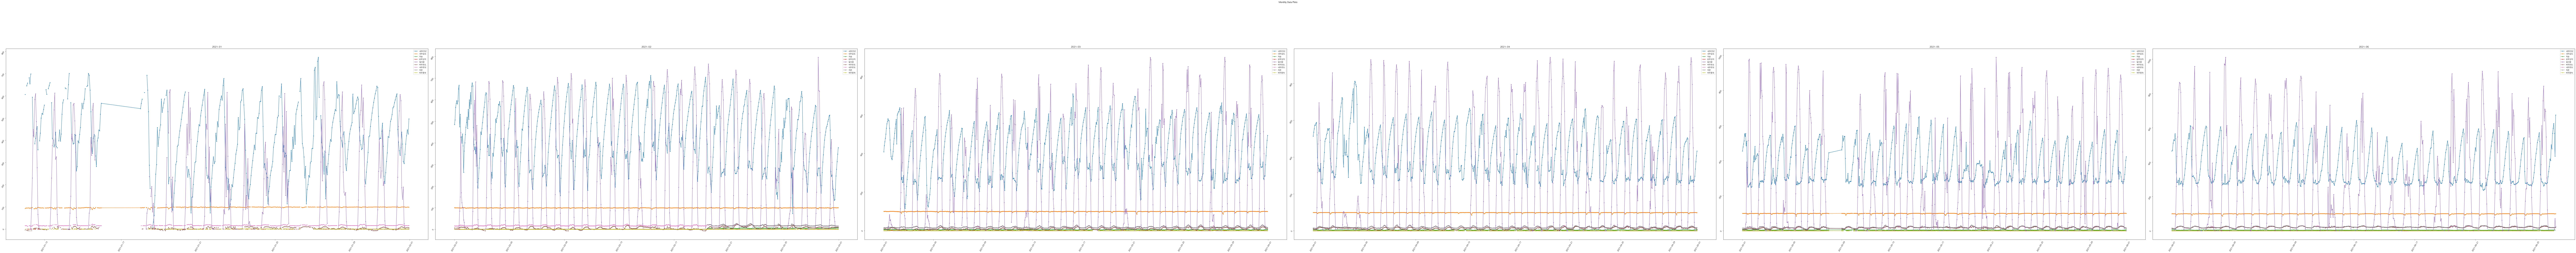

In [144]:
# Group the DataFrame by month
monthly_groups = df_pivoted.groupby(pd.Grouper(freq='M'))

# Create a 6x6 grid of subplots
fig, axs = plt.subplots(6, 6, figsize=(200, 100))
fig.suptitle('Monthly Data Plots')

# Flatten the array of axes for easy iteration
axs_flat = axs.flatten()

# Iterate over each group (month) and plot its data
for ax, (name, group) in zip(axs_flat, monthly_groups):
    ax.plot(group, marker=".")
    ax.set_title(name.strftime('%Y-%m'))
    ax.tick_params(labelrotation=60)  # Rotate x-axis labels if needed
    ax.legend(group.columns)

# Hide any unused subplots
for ax in axs_flat[monthly_groups.ngroups:]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()

In [147]:
def draw_linegraph_by_category_monthly(data, category):

    # Assuming 'data' is your DataFrame and it has a DateTimeIndex
    # Group the DataFrame by month
    monthly_groups = data.groupby(pd.Grouper(freq='M'))

    # Calculate global minimum and maximum values for 내부CO2(ppm)
    global_min = data[category].min()
    global_max = data[category].max()

    # Create a 6x6 grid of subplots
    fig, axs = plt.subplots(3, 2, figsize=(30, 20))  # Adjusted figsize for readability
    fig.suptitle(f'Monthly {category} Data Plots')

    # Flatten the array of axes for easy iteration
    axs_flat = axs.flatten()

    # Iterate over each group (month) and plot its data
    for ax, (name, group) in zip(axs_flat, monthly_groups):
        # Scatter plot for 내부CO2(ppm) against hour of the day
        hours = group.index.hour
        
        co2 = group[category]
        ax.scatter(hours, co2, alpha=0.5, label=category)
        
        # Prepare data for the box plot
        box_data = [group[group.index.hour == hour][category].dropna() for hour in range(24)]
        
        # Add box plot over the scatter plot
        # Find positions for the box plots. In this case, we're aligning them with hours, but slightly offset to avoid overlap
        positions = np.arange(24)
        ax.boxplot(box_data, positions=positions, widths=0.4, manage_ticks=False, patch_artist=True)
        
        # Set the y-axis limits based on the global min and max values
        ax.set_ylim(global_min, global_max)
        
        ax.set_title(name.strftime('%Y-%m'))
        ax.set_xticks(np.arange(0, 24, 1))  # Ensure x-ticks represent each hour
        ax.set_xticklabels(np.arange(0, 24, 1))  # Rotate x-axis labels for clarity
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel(category)
        ax.grid(True)

    # Hide any unused subplots
    for ax in axs_flat[monthly_groups.ngroups:]:
        ax.set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
    plt.show()

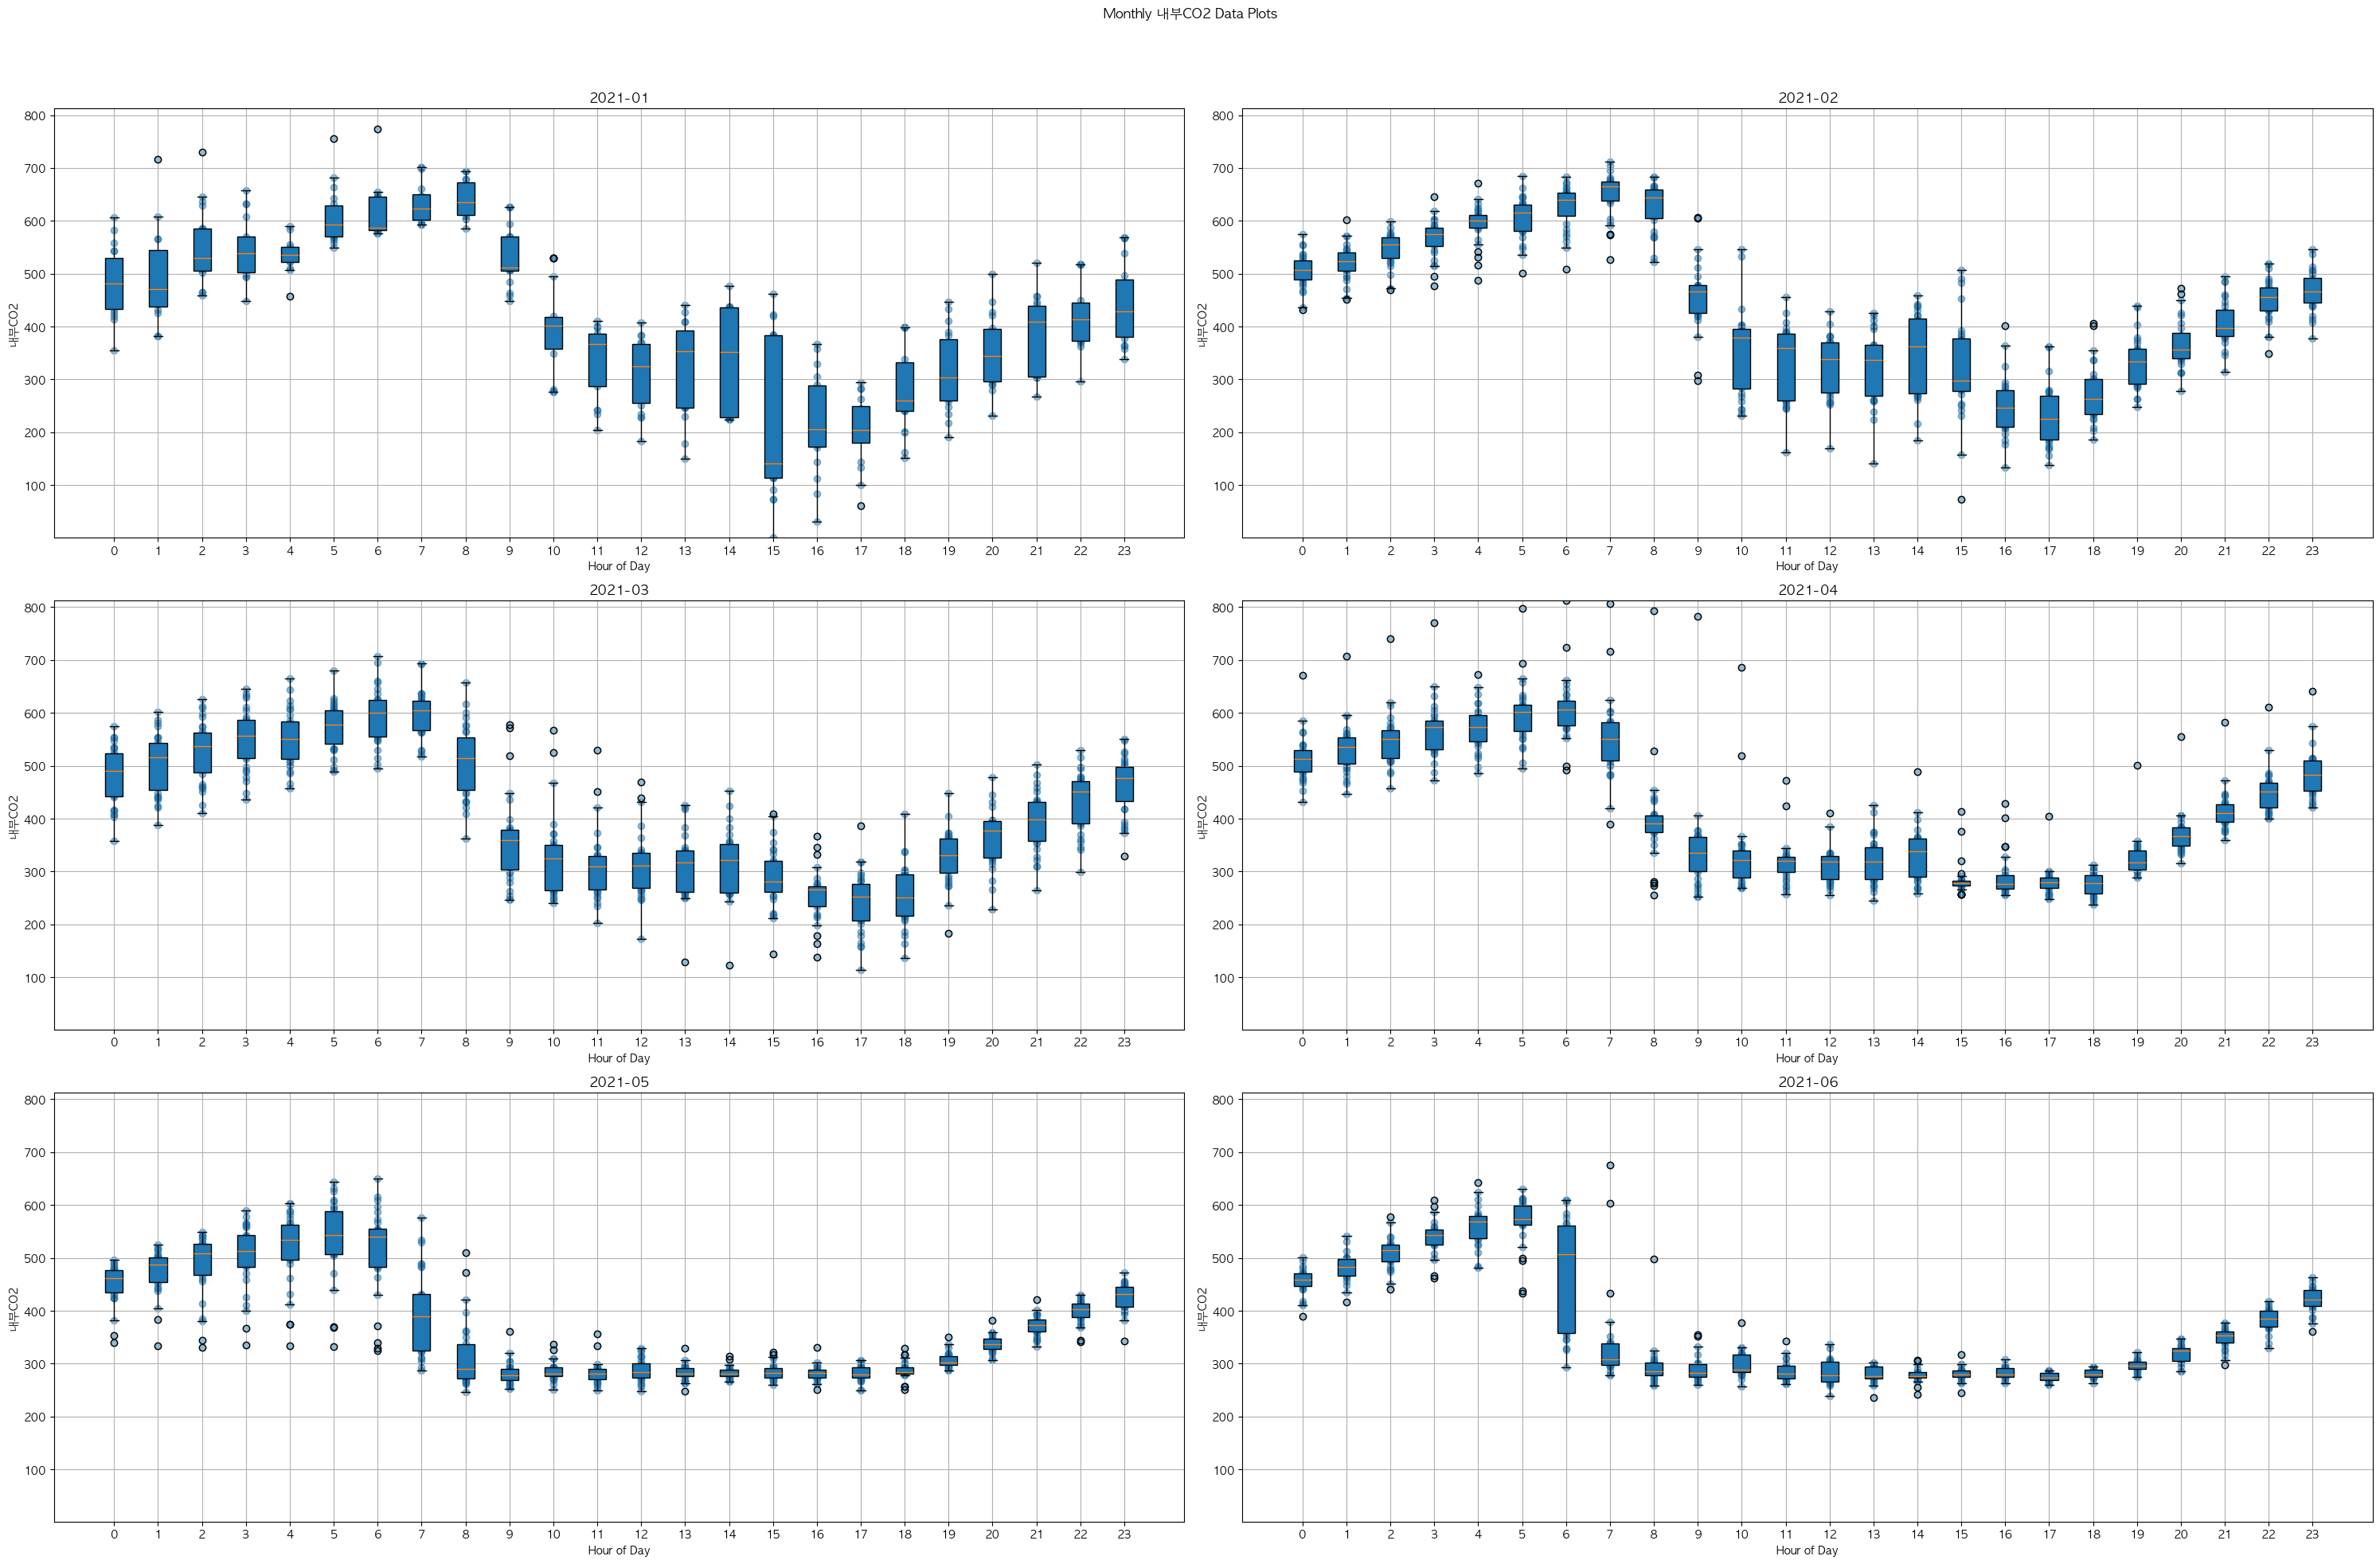

In [148]:
draw_linegraph_by_category_monthly(df_pivoted, "내부CO2")

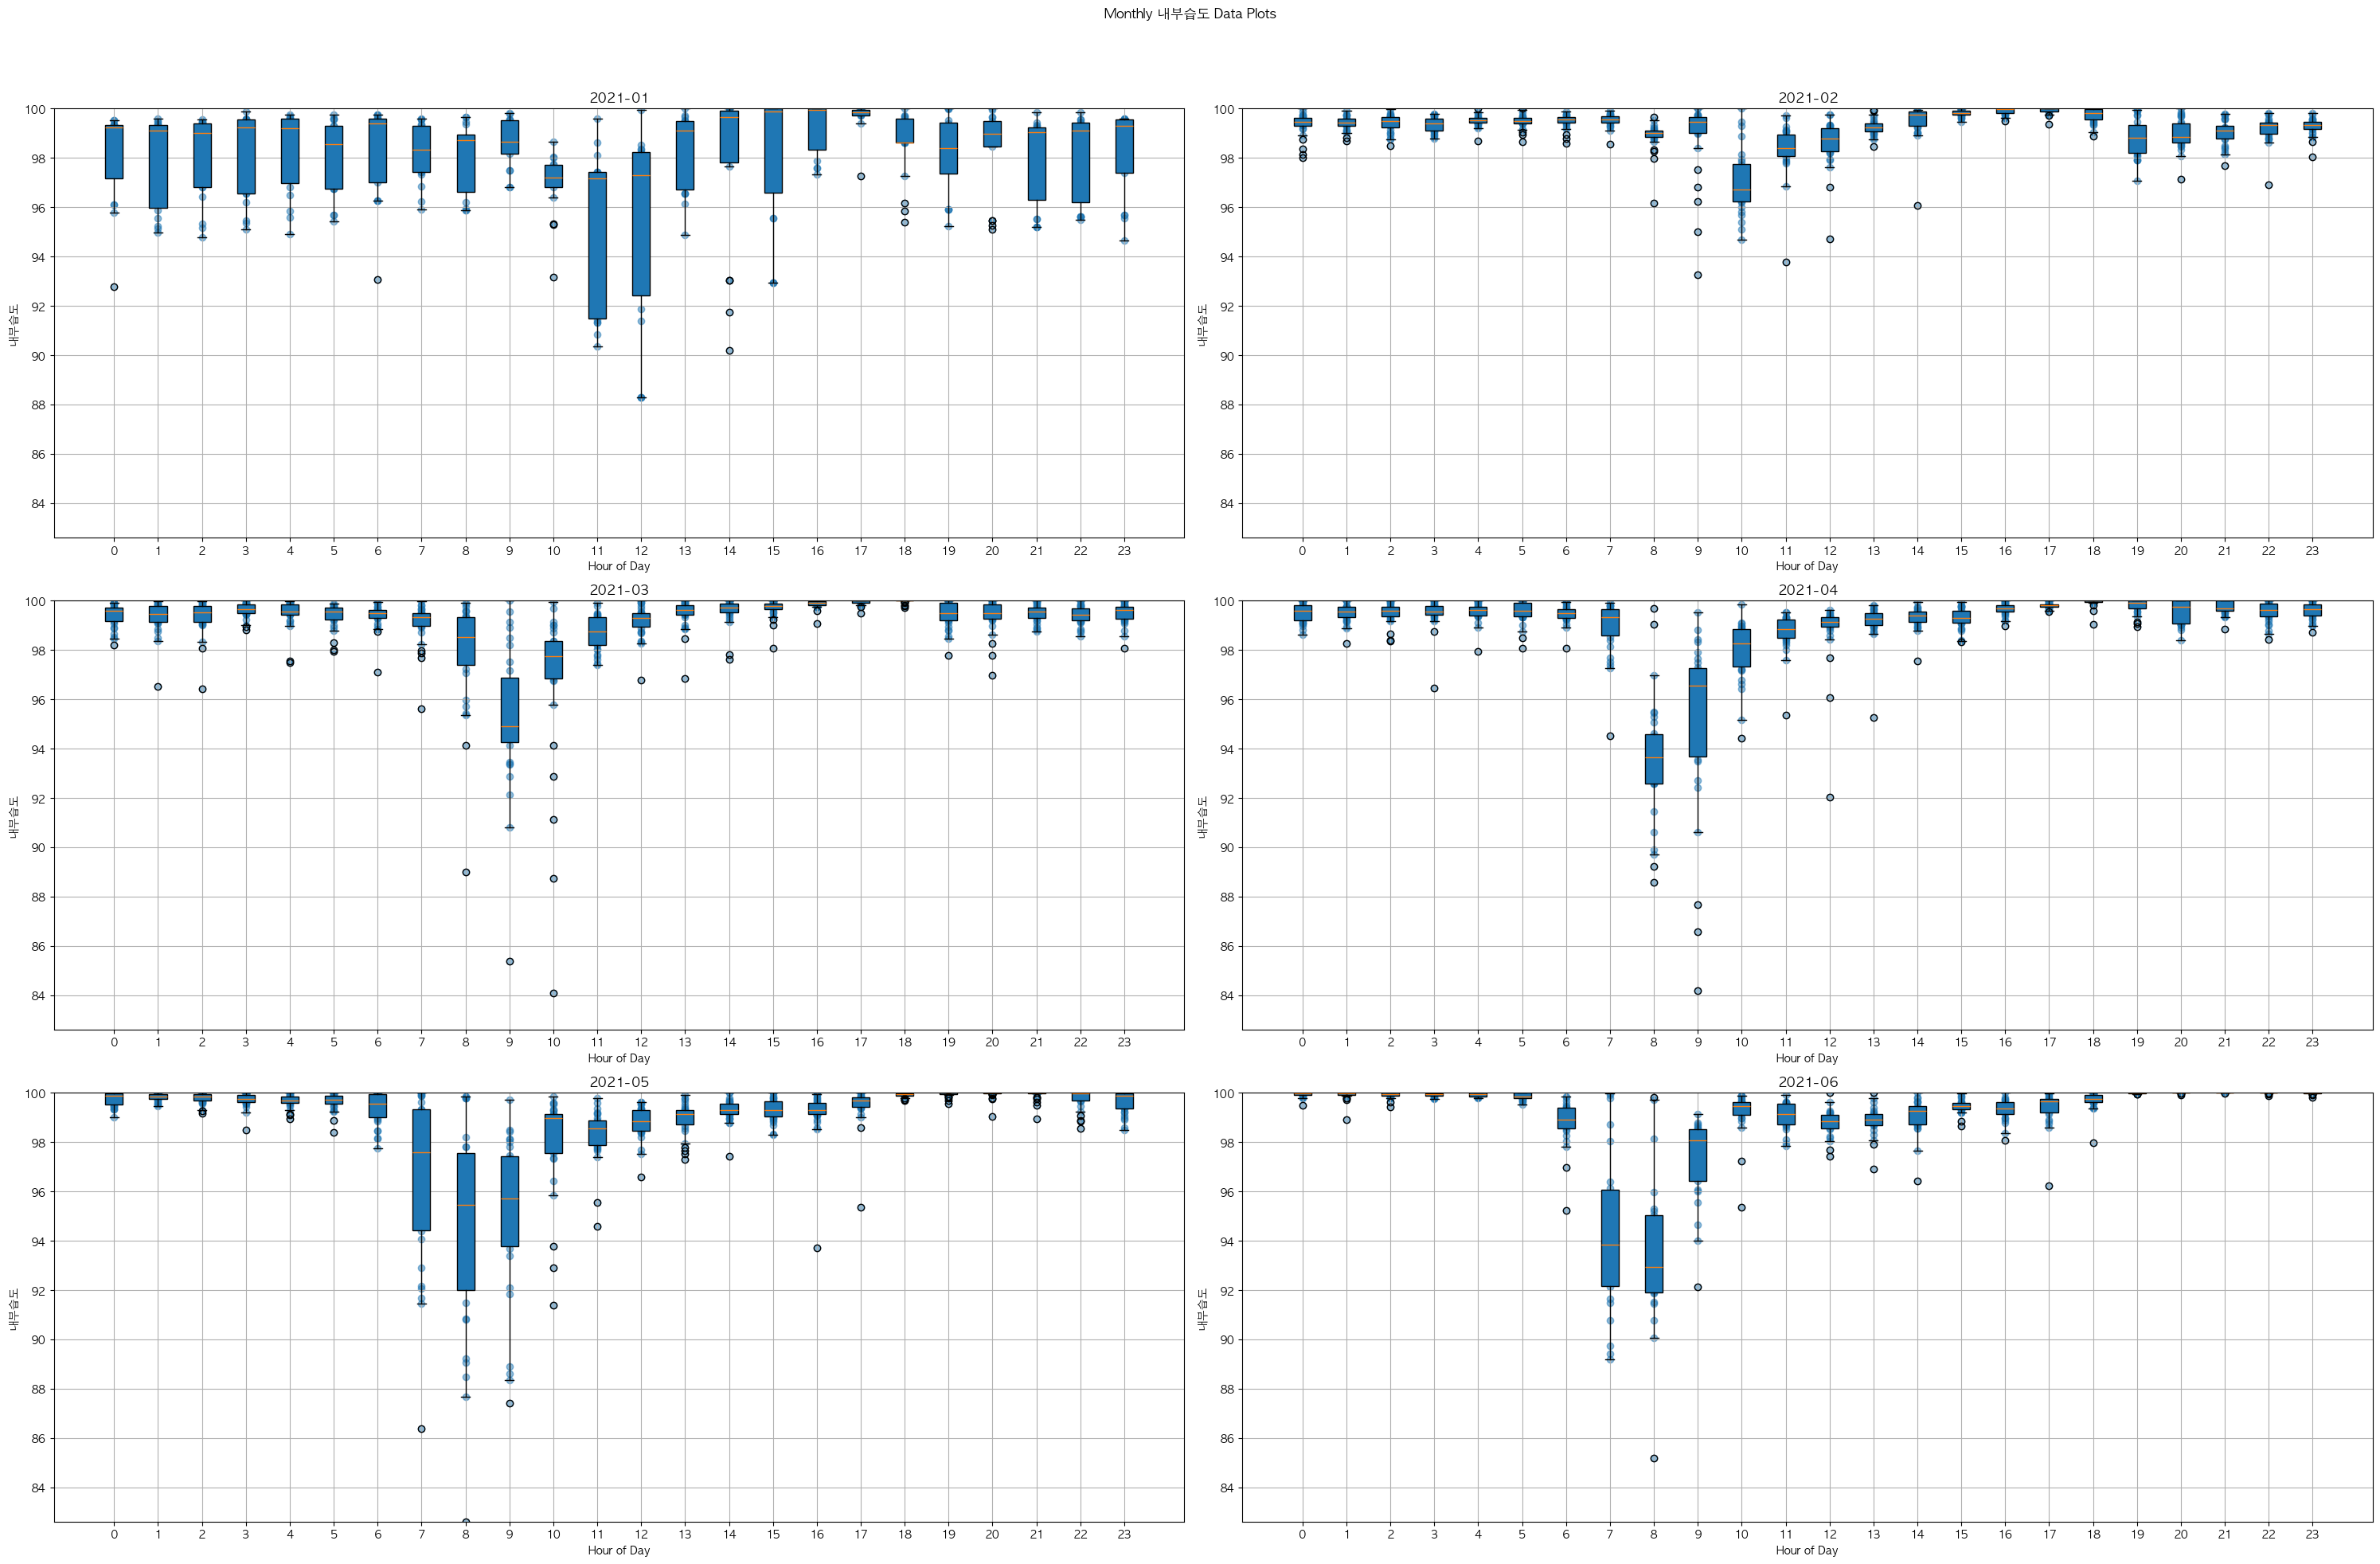

In [149]:
draw_linegraph_by_category_monthly(df_pivoted, "내부습도")

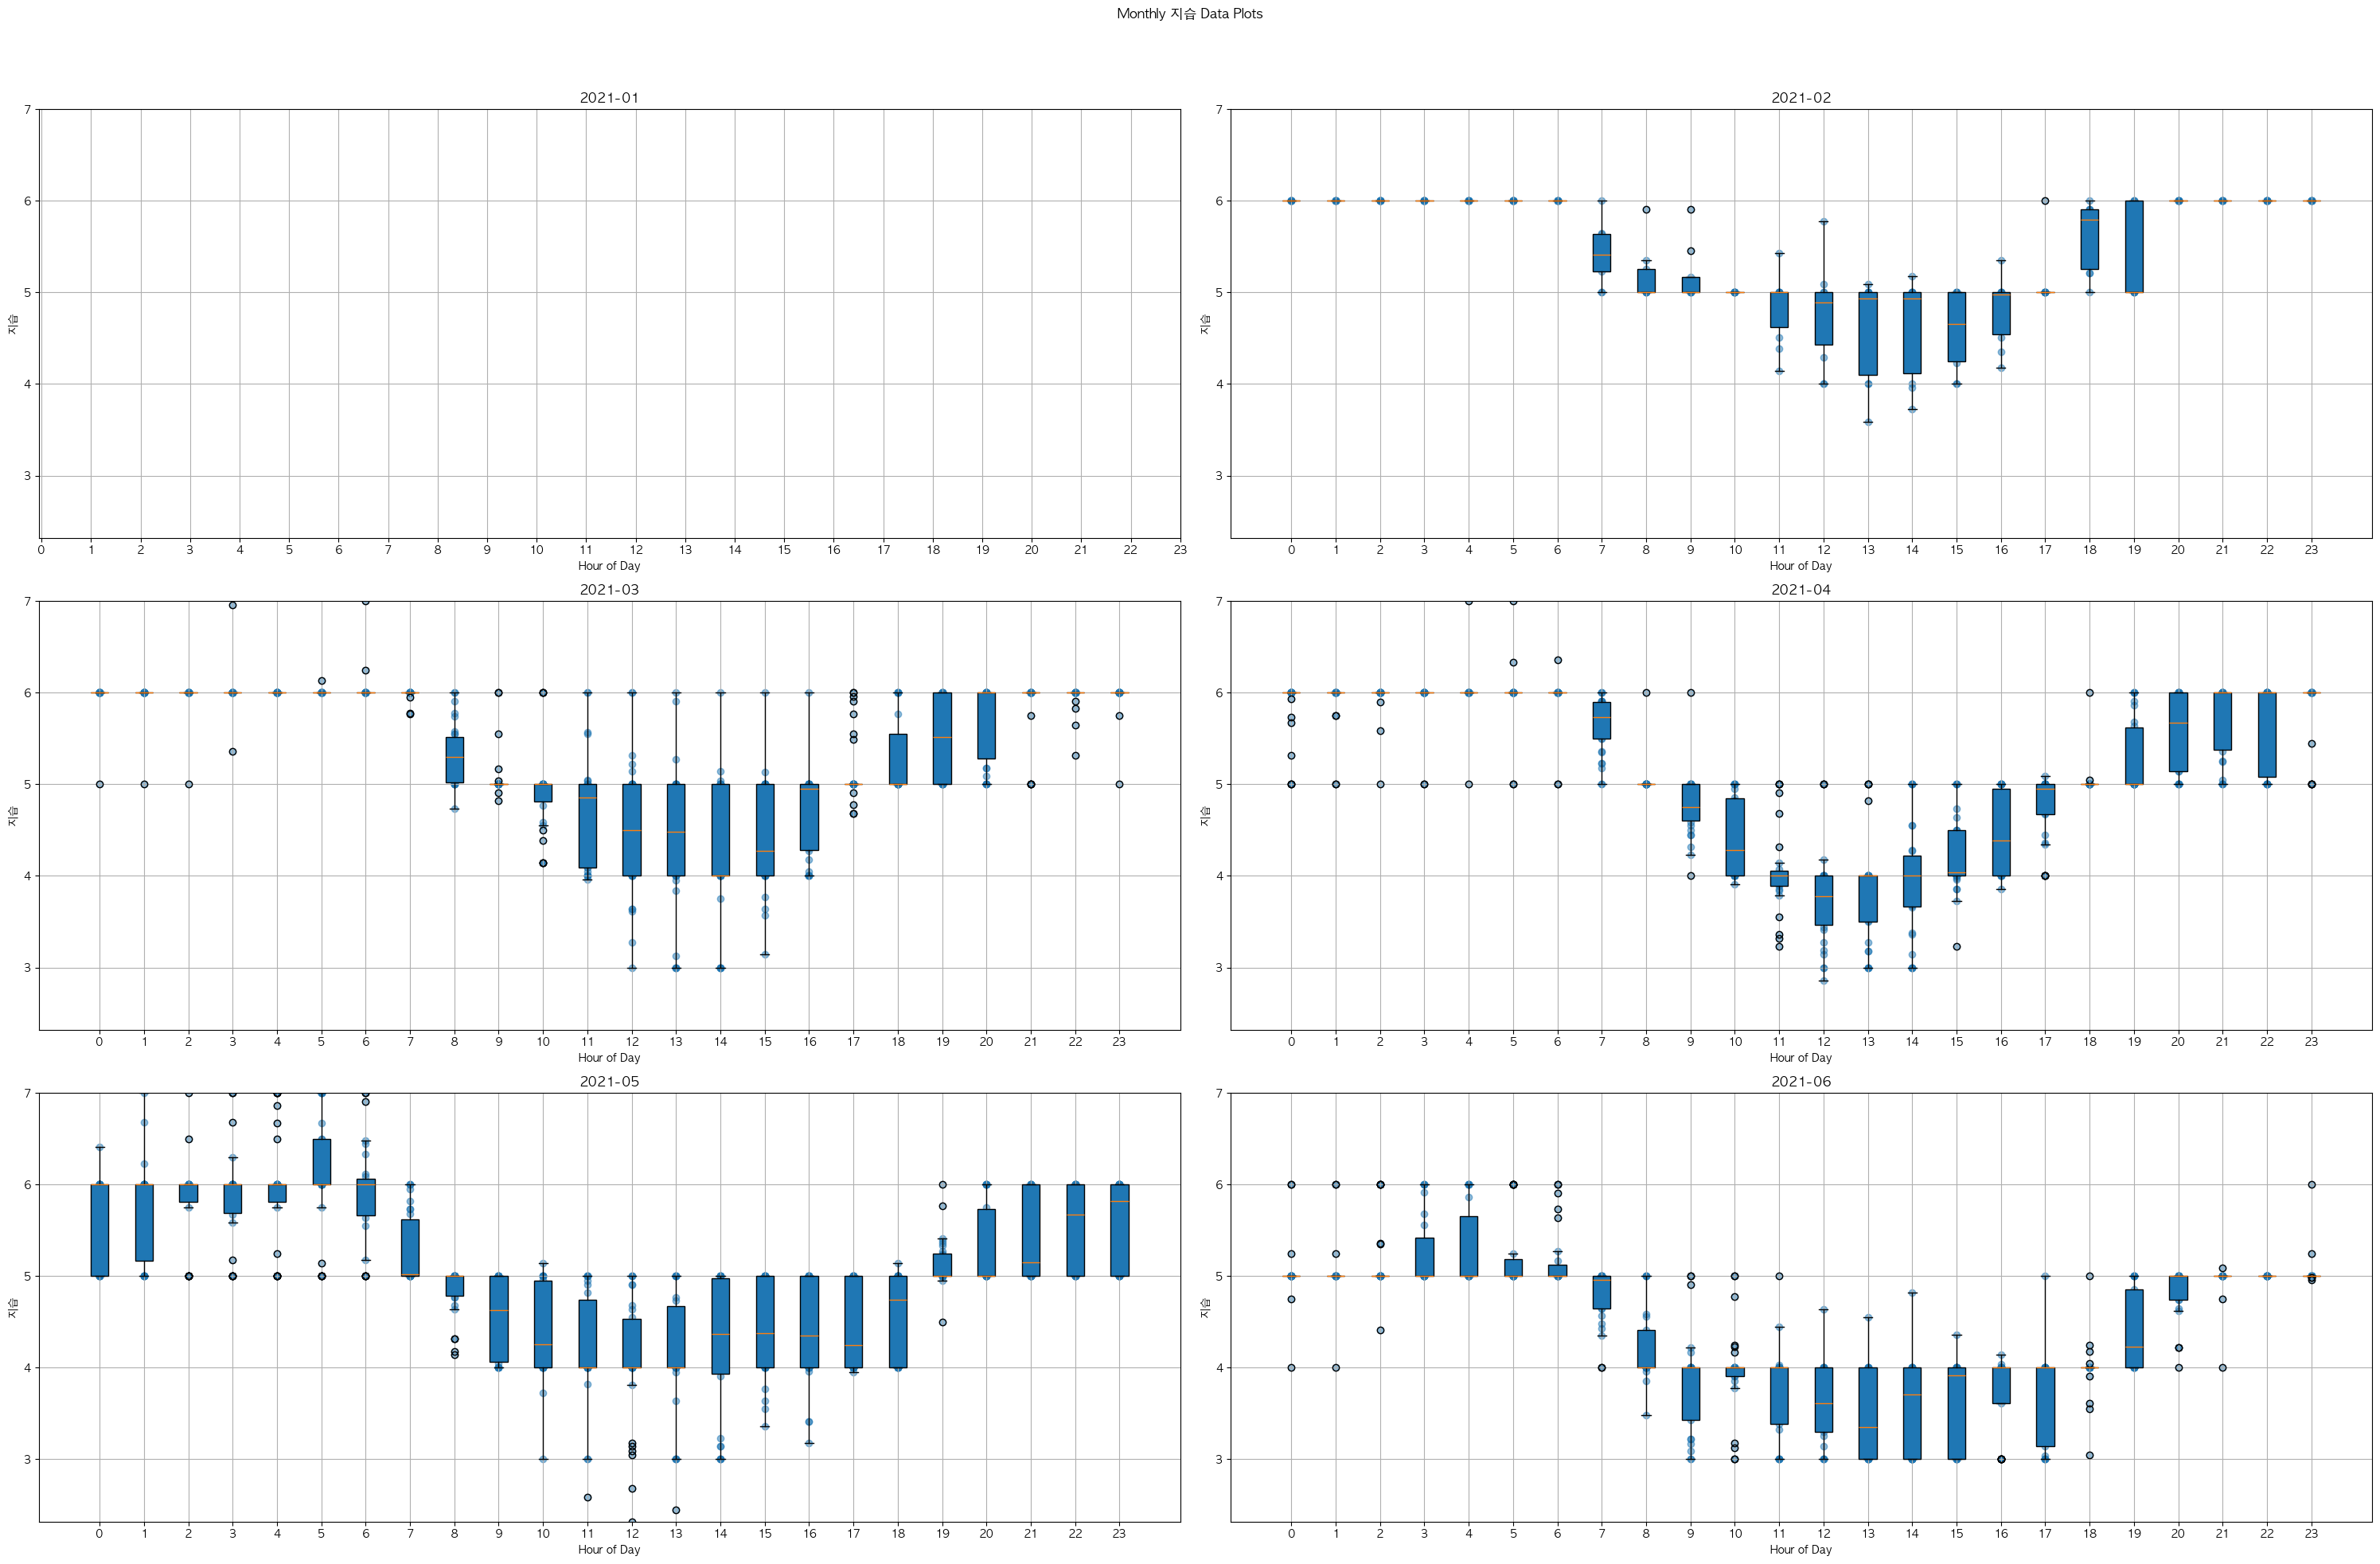

In [150]:
draw_linegraph_by_category_monthly(df_pivoted, "지습")

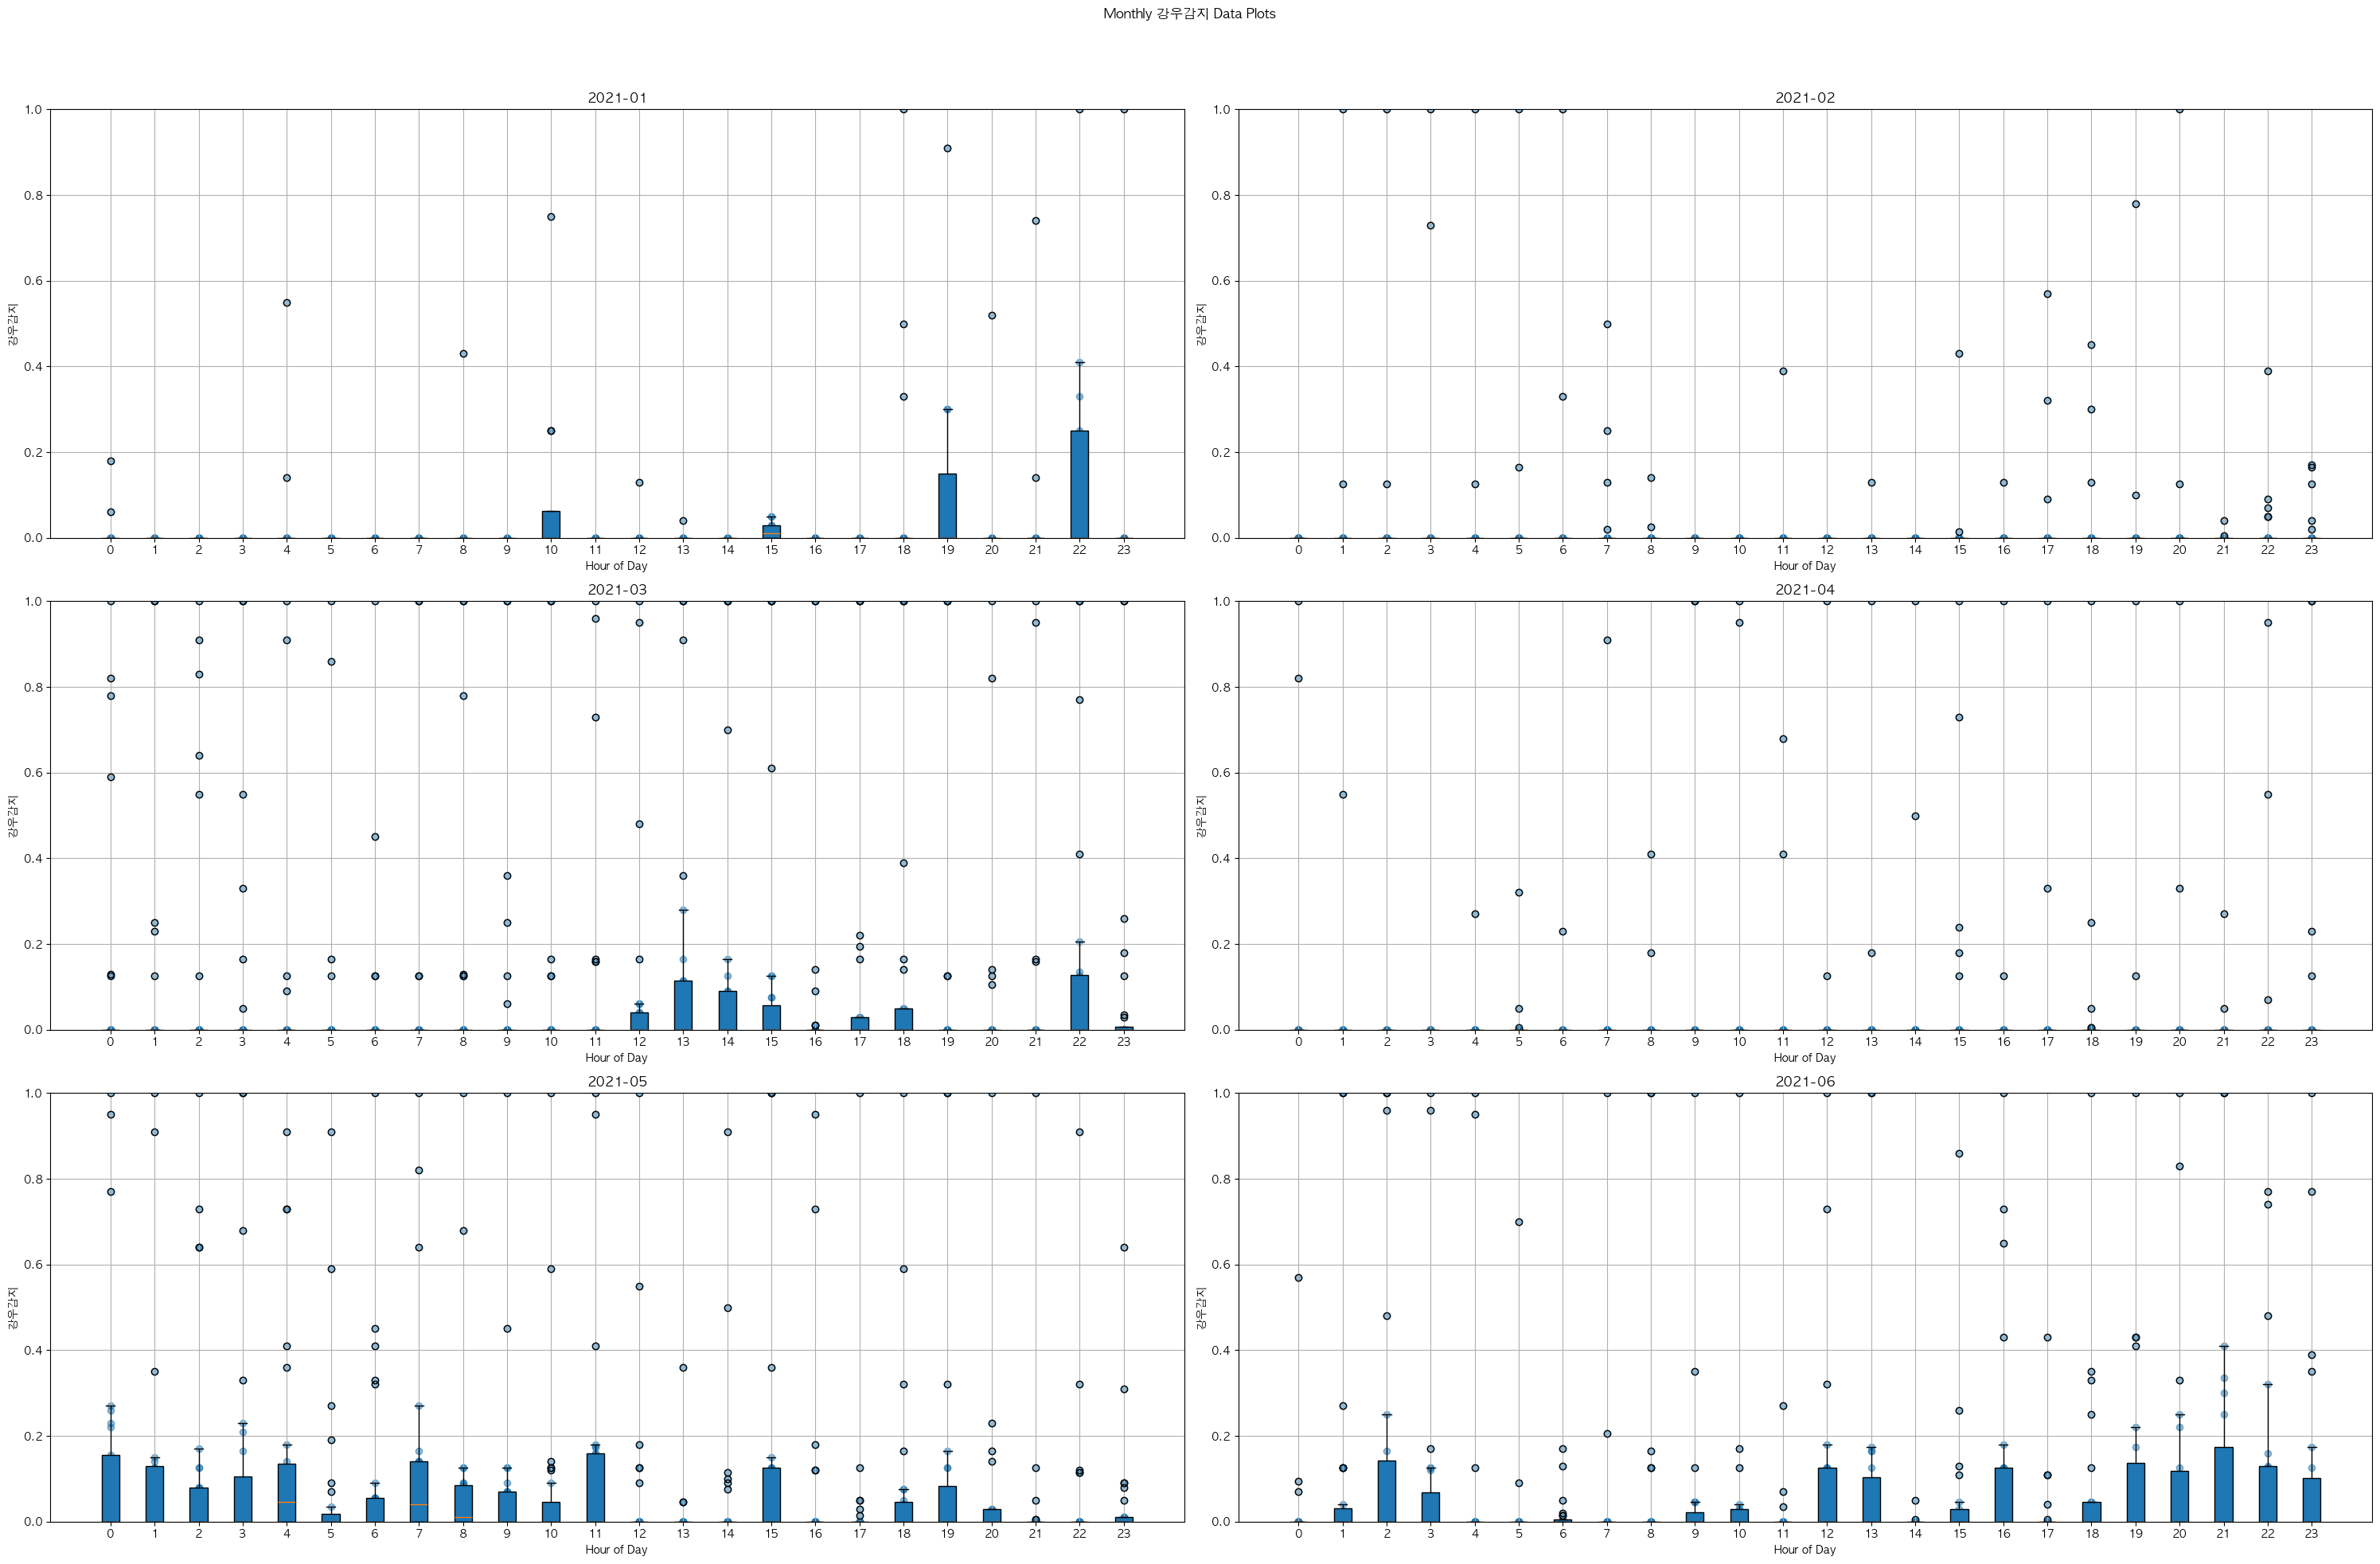

In [151]:
draw_linegraph_by_category_monthly(df_pivoted, "강우감지")

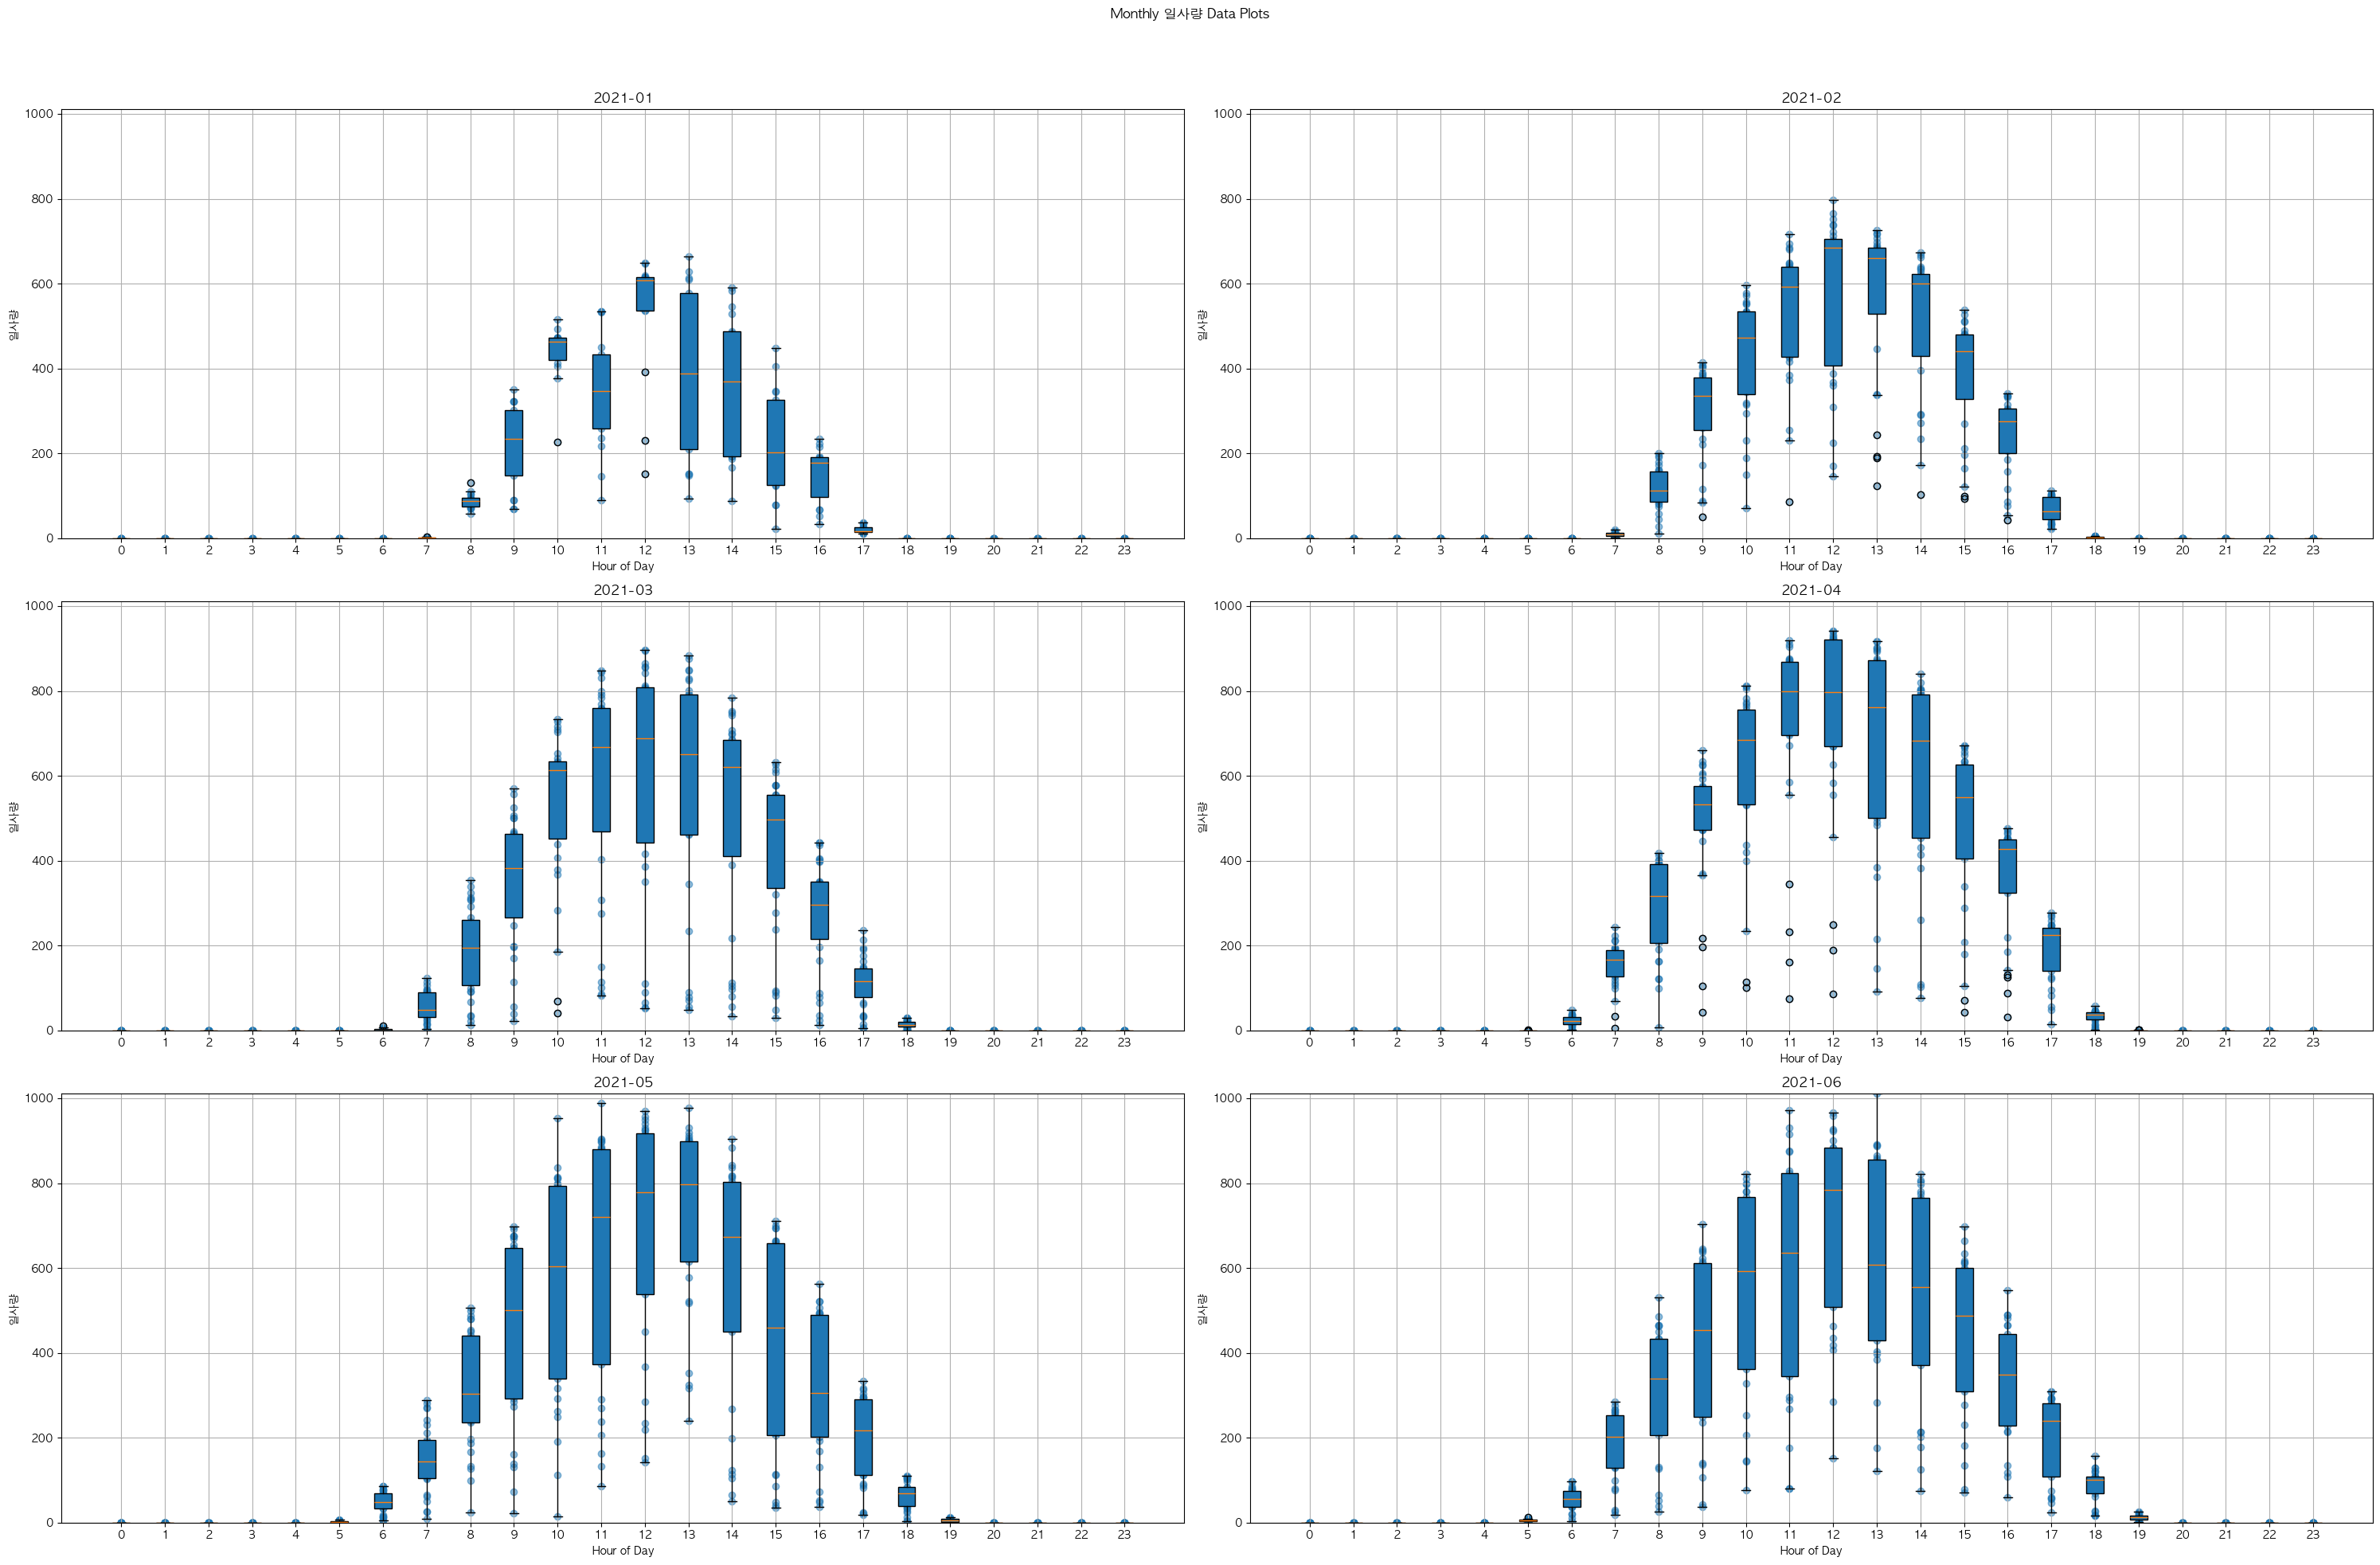

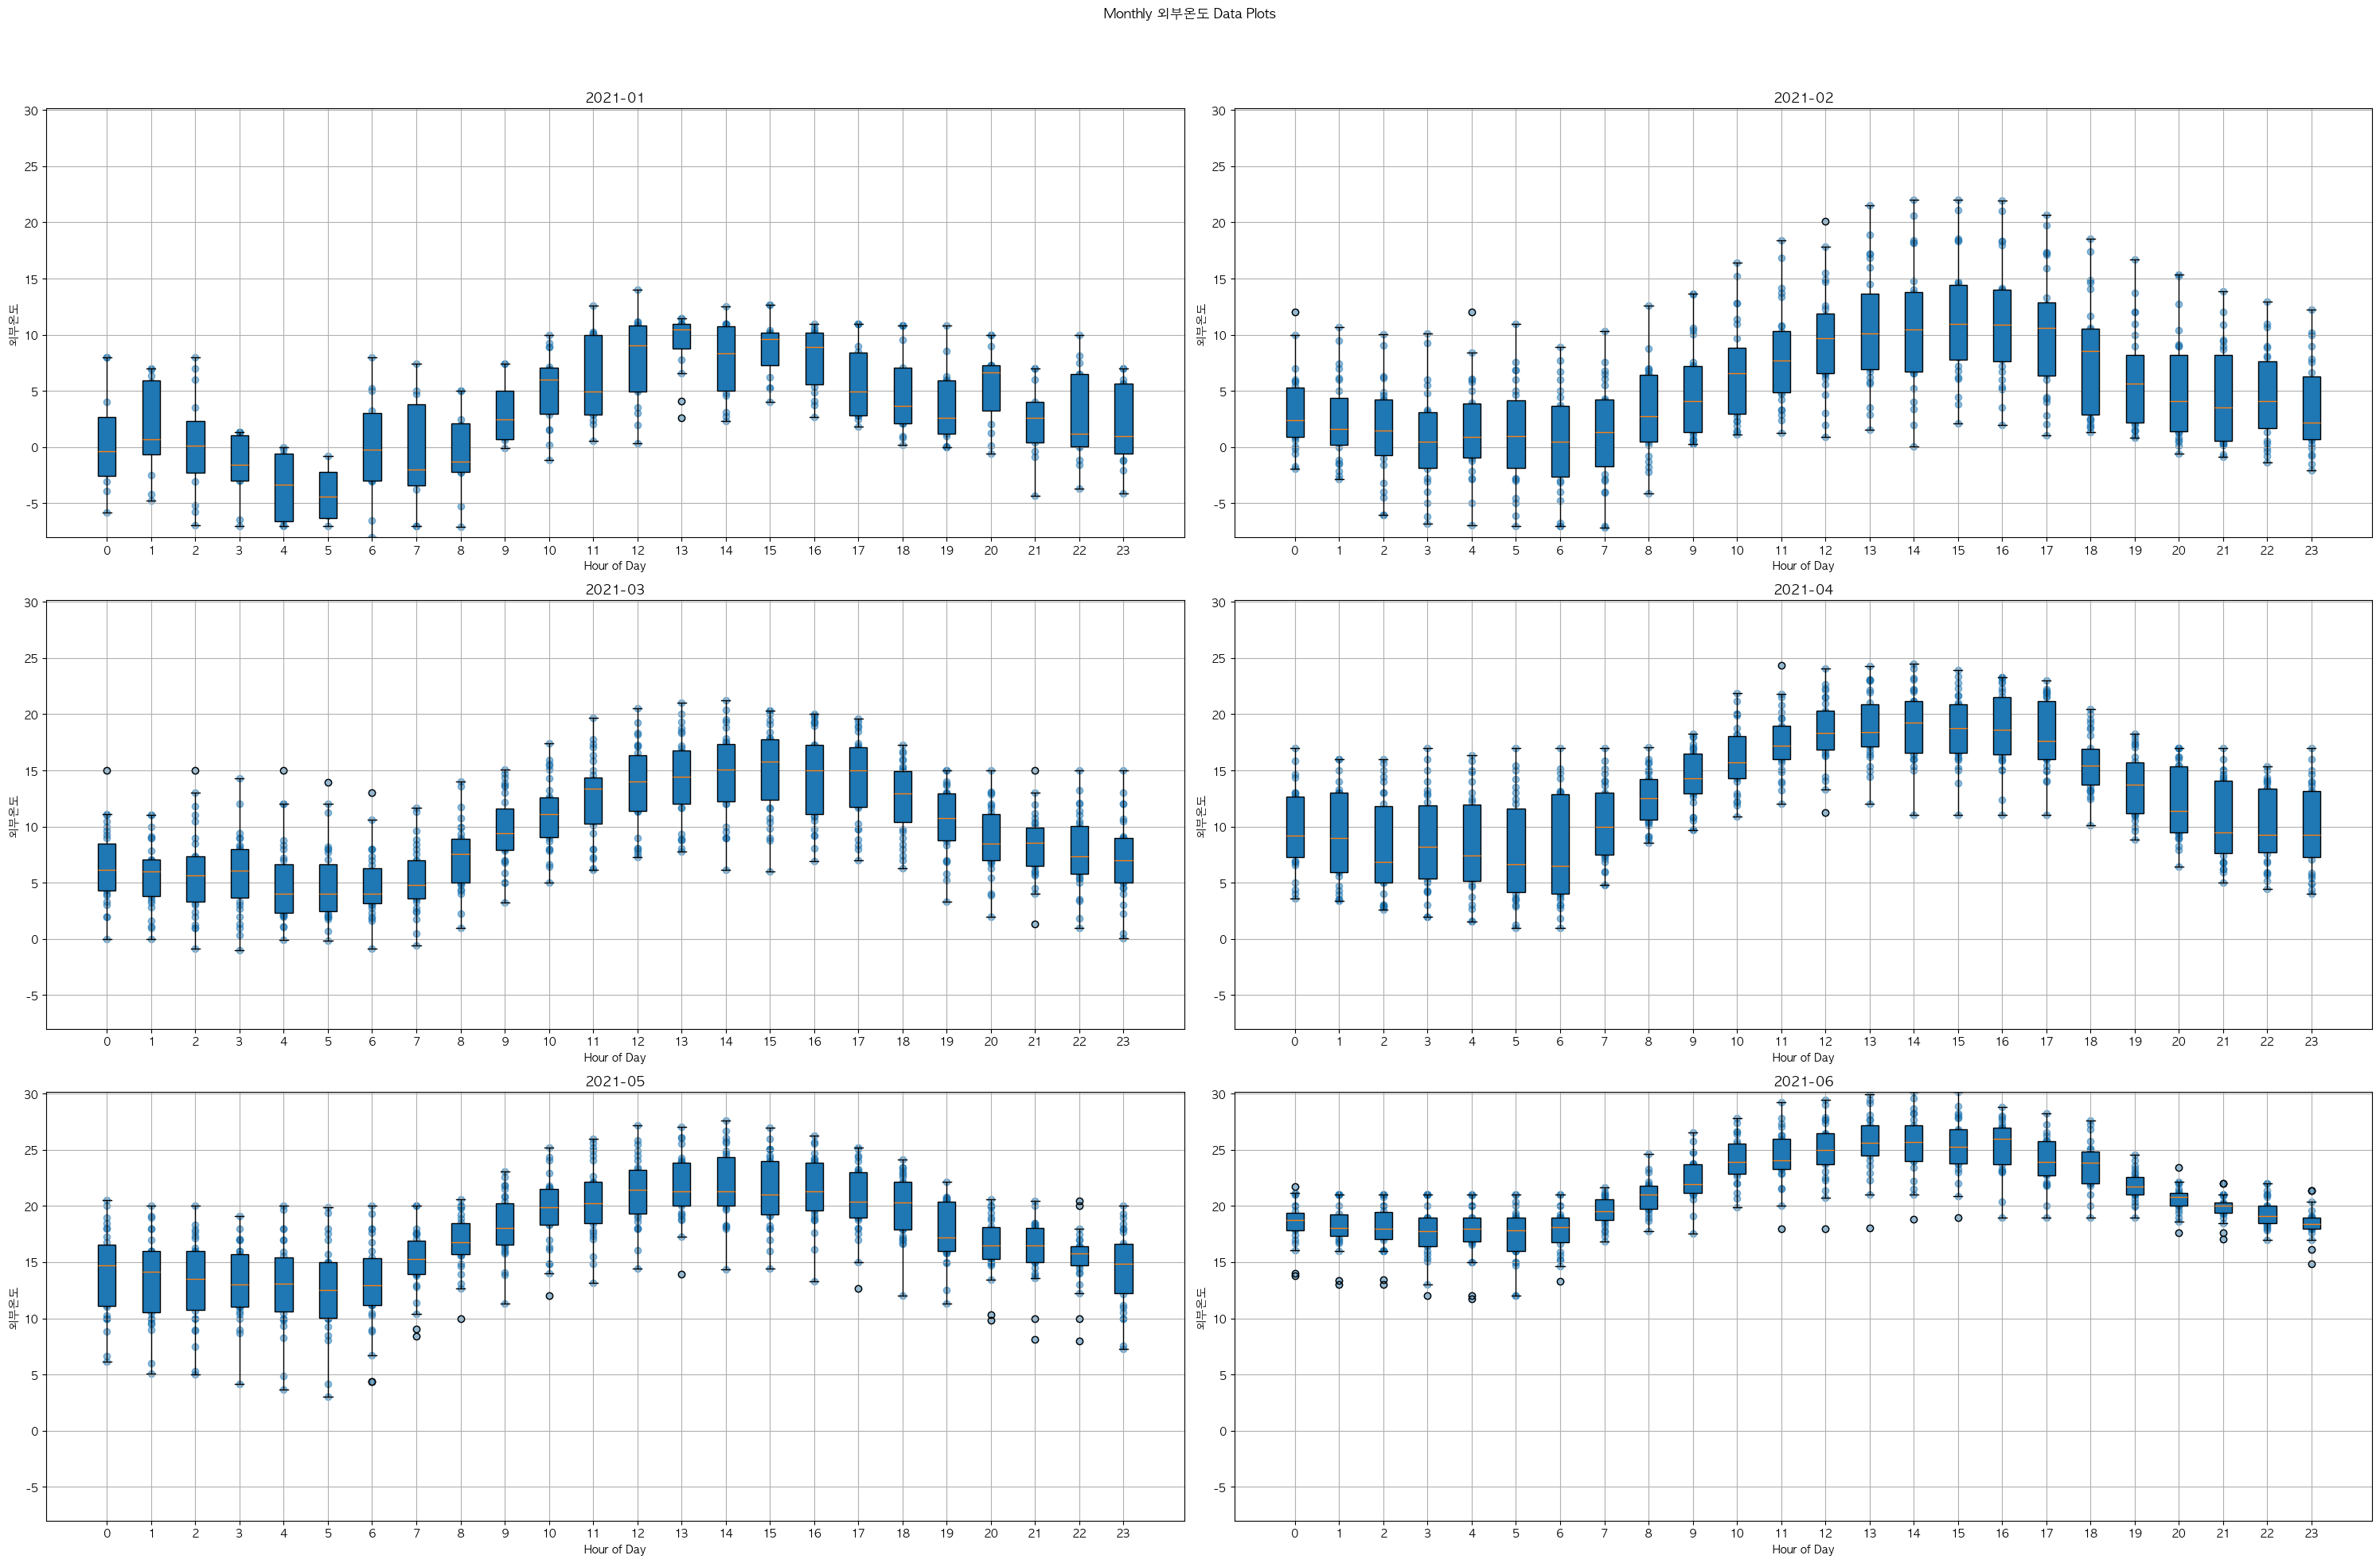

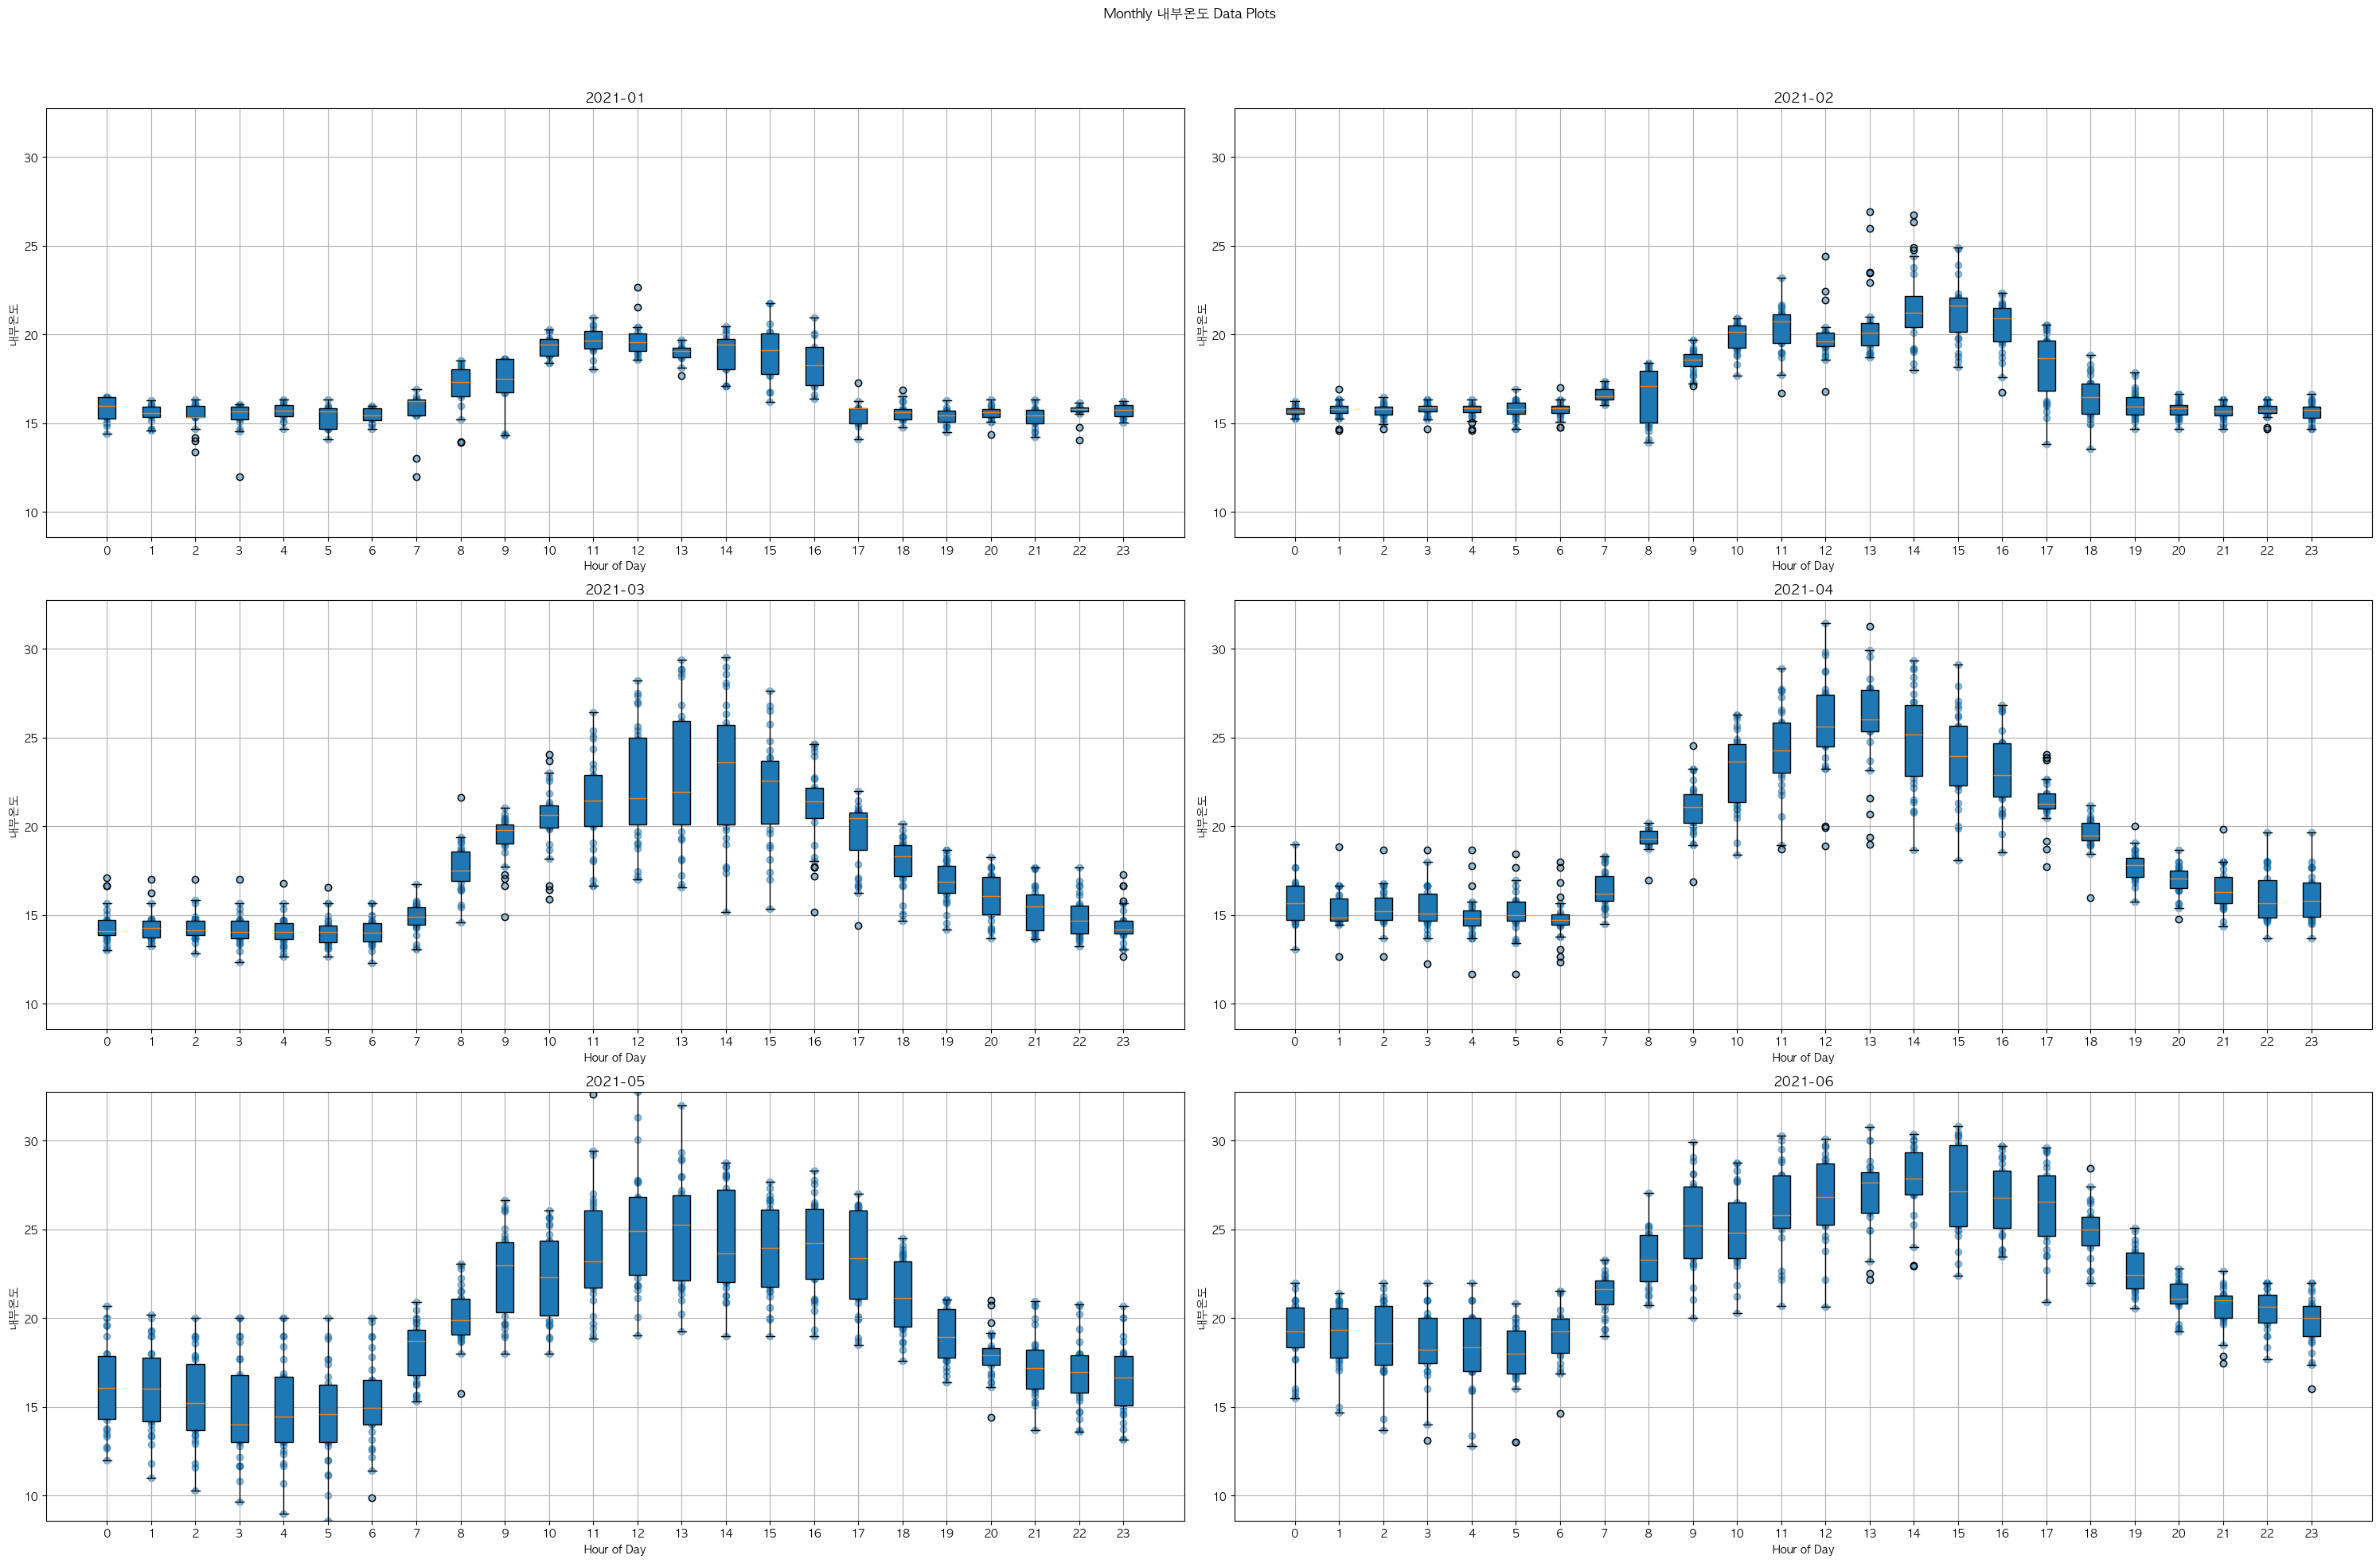

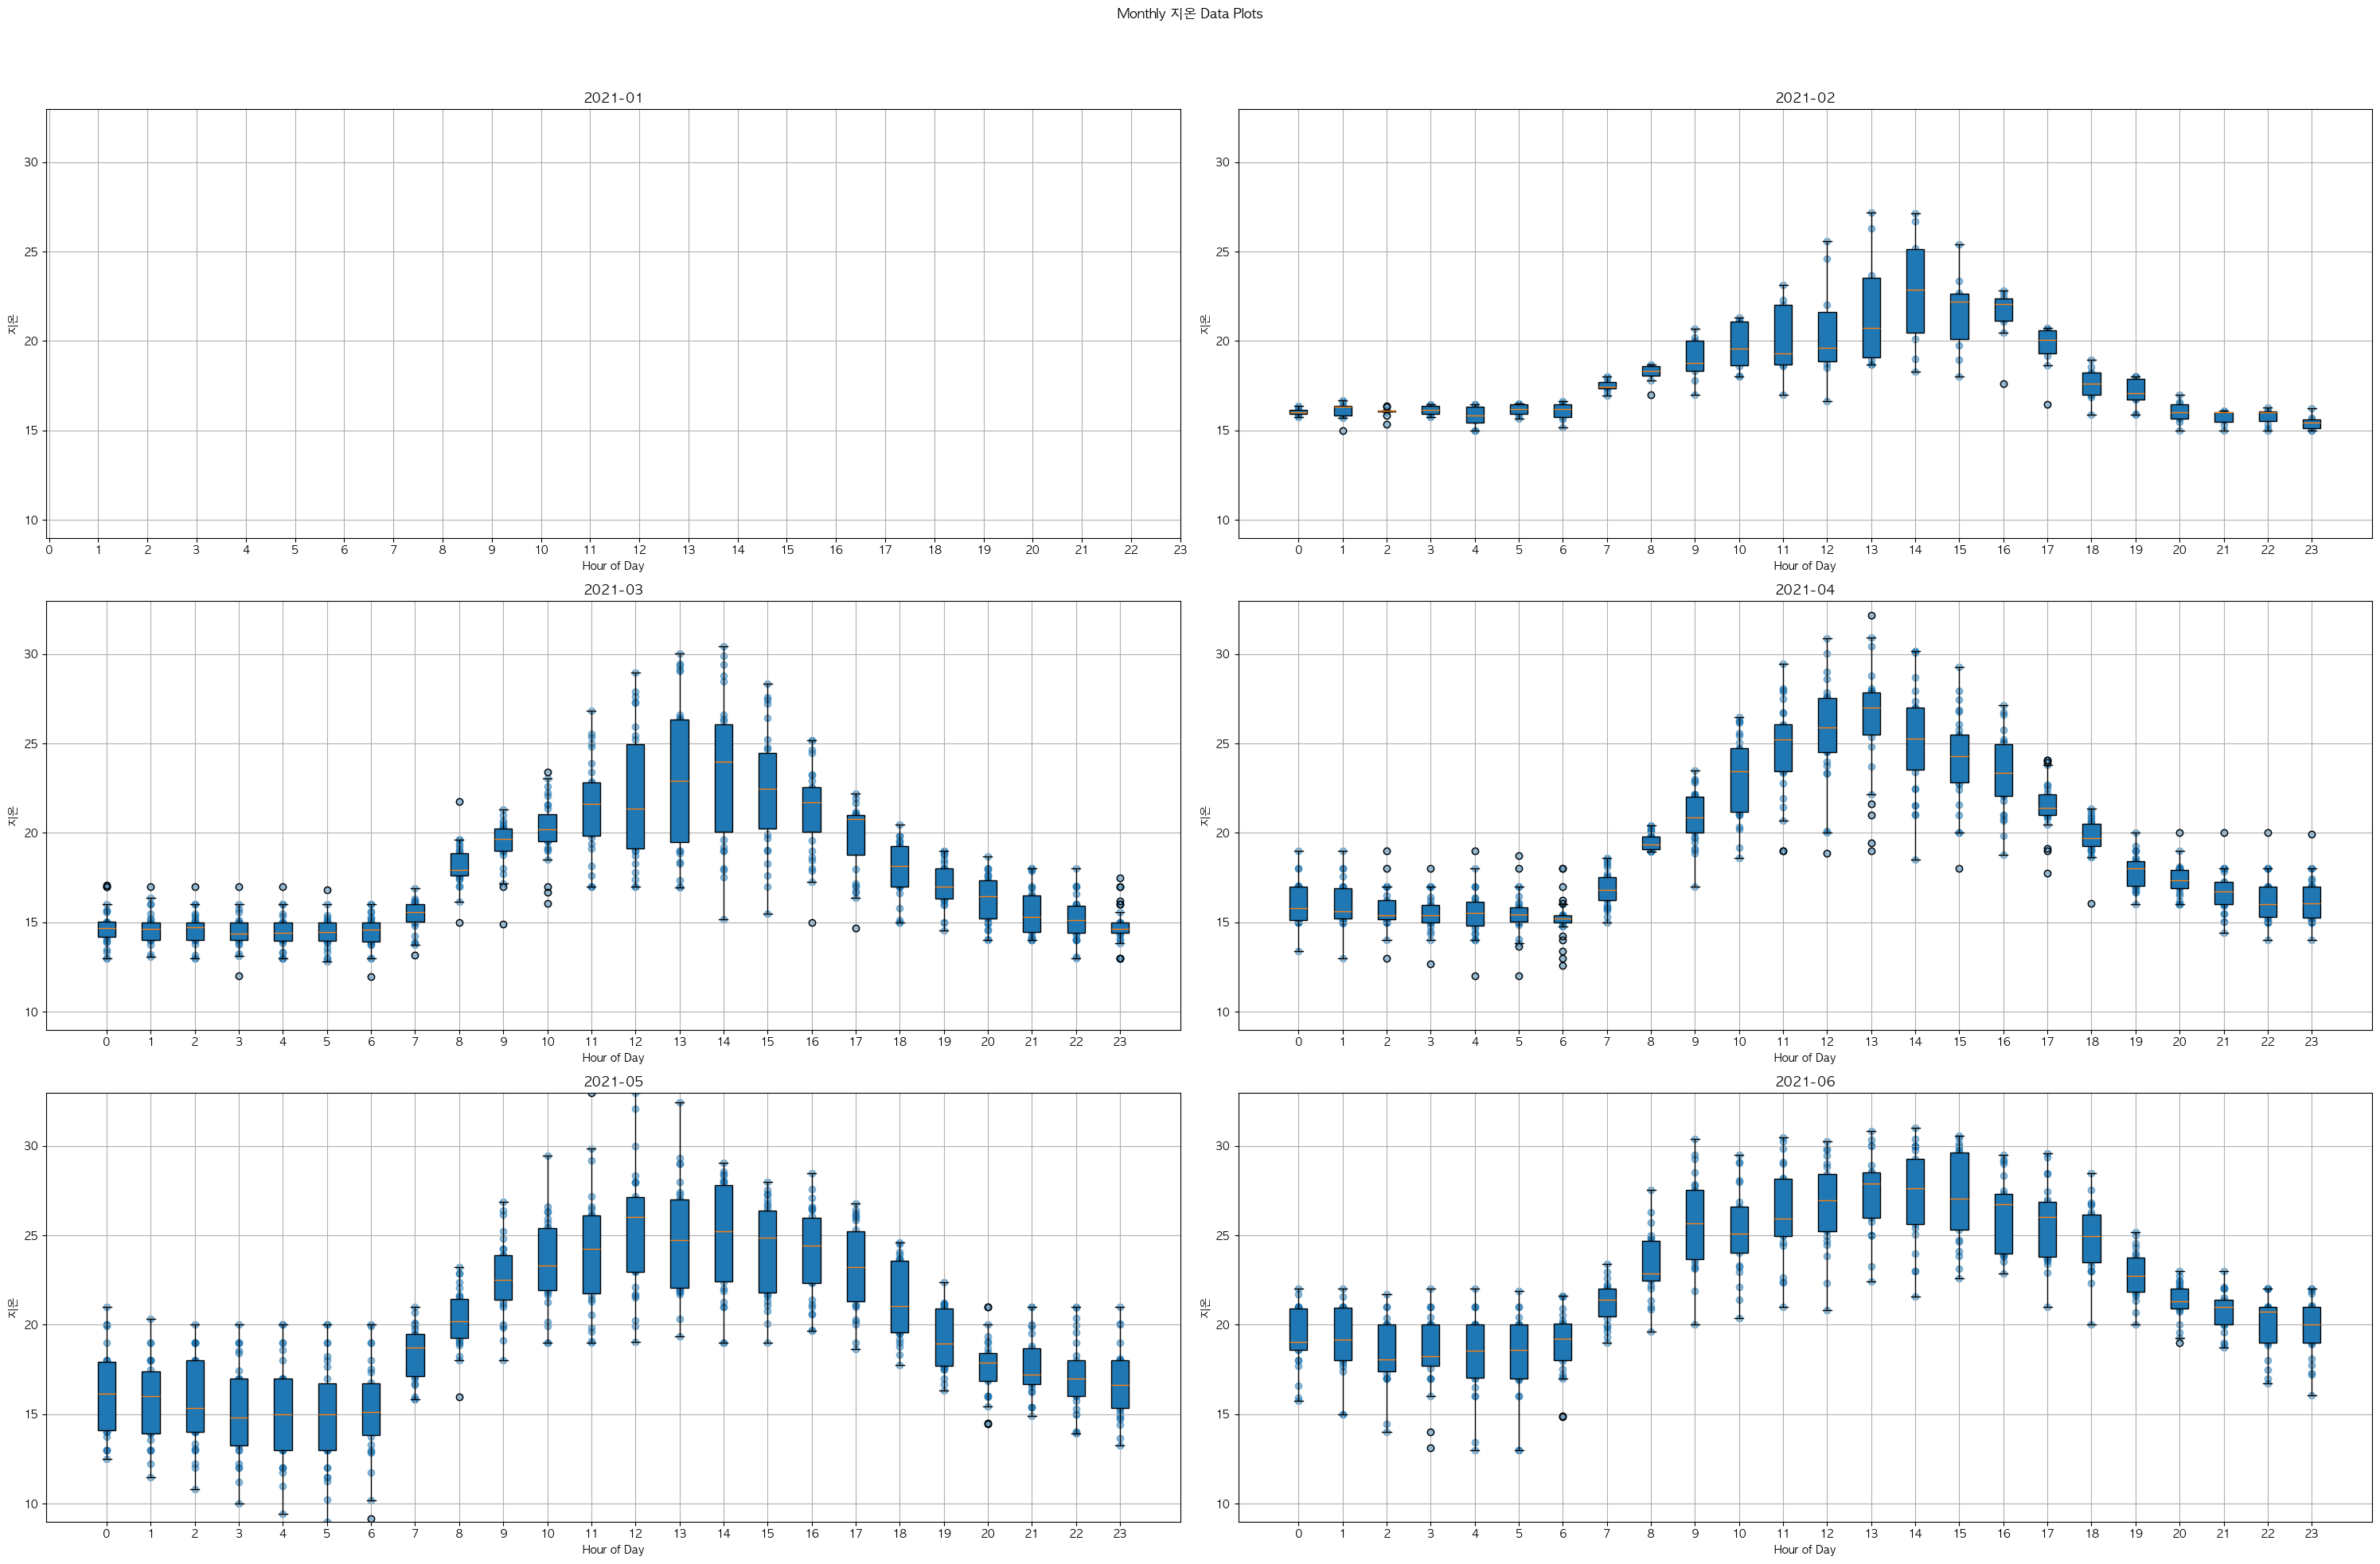

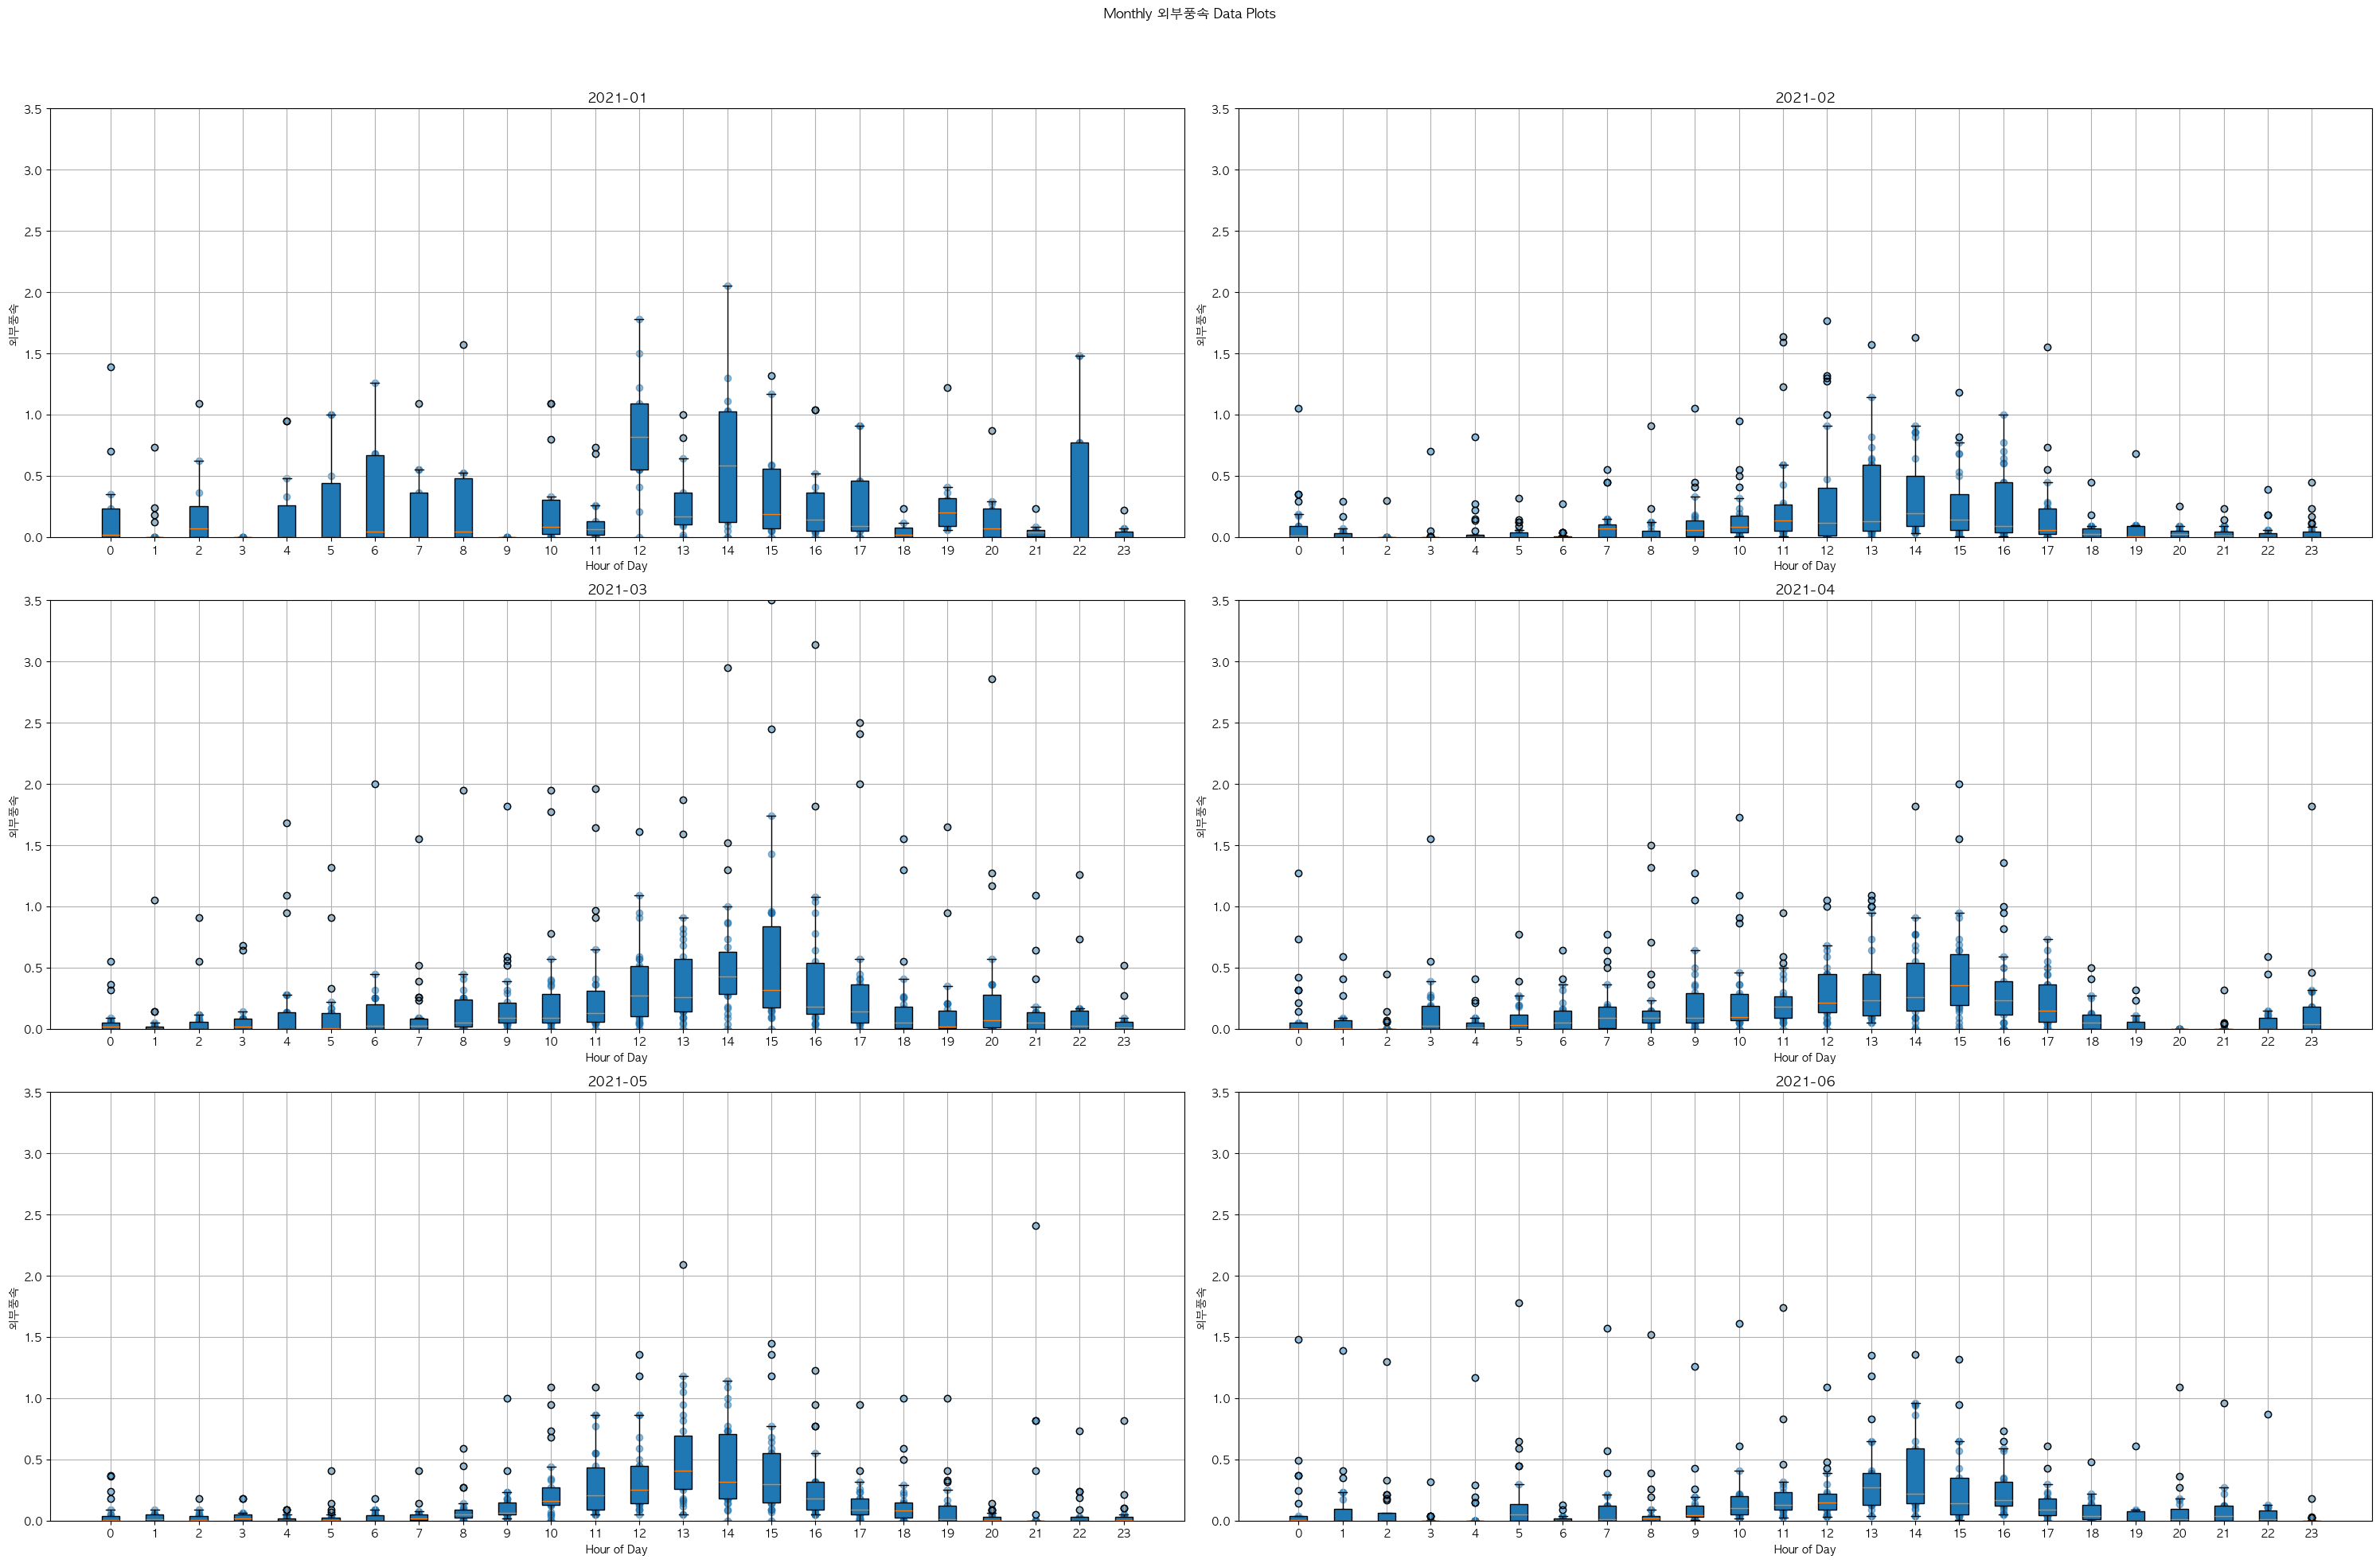

In [152]:
draw_linegraph_by_category_monthly(df_pivoted, "일사량")
draw_linegraph_by_category_monthly(df_pivoted, "외부온도")
draw_linegraph_by_category_monthly(df_pivoted, "내부온도")
draw_linegraph_by_category_monthly(df_pivoted, "지온")
draw_linegraph_by_category_monthly(df_pivoted, "외부풍속")